### Explanation of Data Columns

#### transaction_data.csv, new_transactions.csv:

- **Transaction ID:** Unique transaction Identifier
- **Customer ID:** Unique customer identifier
- **Date:** Date in YYYY/MM/DD format
- **Total Items:** Total items in basket
- **Unique Items:** Unique items in basket
- **Total Sales:** Total expected price
- **Discounted Sales:** Actual price after discounts and vouchers
- **Browsing Duration (minutes):** Time spent browsing on website
- **Number of Clicks:** Actual number of clicks during browsing duration
- **Incomplete Transaction:** Binary outcome of completeness (0 = completed transaction, 1 = incomplete transaction)

#### customer_data.csv:

- **Customer ID:** Unique customer identifier
- **Age:** Age of customer
- **Gender:** Customer’s gender
- **Region:** Region characteristic of customer’s household
- **Marital Status:** Customer marital status
- **Education:** Different levels of maximum education level for customer
- **Household Income:** Total annual income on household
- **Loyalty Card:** Customer has loyalty card (0 = No, 1 = Yes)
- **Loyalty Points:** Loyalty points per customer at the end of the analysis period


# Explain
- Methodology 
- The output of the model you used
- How the output can be used to influence digital sales strategy (regarding incomplete baskets)
- Additional data you could ask to enhance your analysis
- Explanation of metrics used to assess the predictive value of your model
- Any Caveats and additional research you would need to do to make the results more accurate

# Notes 
- i did not trasform the numerical feature distributon. some of them are not nromal. we can check this later.
- some algorithms have class weight hyperparameters that we can use
- try normalization on those numeric feature **without normal distribution** and try standard scaling on those numeric feature **with normal distribution**
    - i tried this and a little improved the recall and percision 
- I also implemented different costs in the support vector machine, which helped.
- feature selection
- remeber to train a model on entire dataset for that new prediction 
- remeber to explain why we expect low performance considering biviarnt analysis

# Techniques to Tackle the Trade-Off
- Threshold Adjustment: Most classifiers predict probabilities. By adjusting the prediction threshold, you can influence the precision-recall trade-off. A higher threshold boosts precision but lowers recall, and vice versa.
- Resampling Techniques: These involve oversampling the minority class or undersampling the majority class to create a more balanced training dataset.
- Cost-Sensitive Learning: Assign different misclassification costs to different classes, guiding the model to focus on the minority class.

# observation
- normalization of numeric reduced the recall for Xgboost drastically and increase the precision.
- tiil now the best result is for standard scaller, onehot encoding, under sampling  on XGboost
-untill now the be

#### The work done here and the changes made to the data are based on a progressive review:

### Initial Data Preparation:

After reading the .csv files as the dataframes `transaction_data` and `customer_data`, the following changes were made:

1. The `transaction_data` and `Customer_data` data were merged together based on the Customer ID column.
2. A new feature called "Discount Percentage" was created in the DataFrame `df` by calculating the percentage difference between "Total Sales" and "Discounted Sales".
3. The `Month` feature was created by extracting the month from the `Date` column.
4. `Unique Items per Total Item` was created by dividing the `Unique Items` column by the `Total Items` column in the DataFrame.
5. `Customer ID`, `Date`, and `Transaction ID` were dropped since they lacked any information for the machine learning model.
6. The number of outliers was checked using the z-score method, but it was decided not to drop them as there were not many in the dataset, keeping data preparation simple.



### Data Preprocessing

1. The data was split into test and train before any changes were made to it. The split was done in a way to keep the unbalanced distribution of the original data in both test and train sets.
2. Numerical features were imputed for missing values using the mean and scaled using StandardScaler.
3. Categorical features were imputed for missing values using the most frequent value and encoded using one-hot encoding.
4. The training dataset was balanced using RandomOverSampler to address class imbalance.


### Model Evaluation

The models were evaluated using the following steps:

1. The models were trained and evaluated using cross-validation with grid search to find the best hyperparameters and the best method for balancing the training dataset.
2. The best model and its hyperparameters were selected based on the highest cross-validated score.
3. The experimented models include RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier, LogisticRegression, KNeighborsClassifier, XGBClassifier, CatBoostClassifier, AdaBoostClassifier, and SVC.
4. The selected model was then evaluated on the training and testing datasets.
5. XGBoost classifier was selected after grid search CV. We also chose the RandomOverSampler to address class imbalance.


### Evaluation metric
 



# Libraries

In [2]:
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import joblib
import os
from datetime import datetime
import random
random.seed(42)
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import  make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

#  Define a colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# import pandas as pd
# import os
# from pathlib import Path

# # Get the current working directory
# current_directory = Path(os.getcwd())
# print("Current Directory:", current_directory)


# # Define the relative path to the transaction data
# relative_transaction_data_path = Path('data/transactions_data.csv')
# relative_customer_data_path = Path('data/customer_data.csv')
# relative_new_transaction_data_path = Path('data/new_transactions.csv')

# # Construct the absolute path using the current working directory and the relative path
# transaction_data_path = current_directory / relative_transaction_data_path
# customer_data_path = current_directory / relative_customer_data_path
# new_transaction_data_path = current_directory / relative_new_transaction_data_path

# transaction_data = pd.read_csv(transaction_data_path)
# customer_data = pd.read_csv(customer_data_path)
# new_transaction_data = pd.read_csv(new_transaction_data_path)

In [4]:
# Load data
transaction_data = pd.read_csv(r'C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\notebook\data\data\transactions_data.csv')
customer_data = pd.read_csv(r'C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\notebook\data\data\customer_data.csv')
new_transactions = pd.read_csv(r'C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\notebook\data\data\new_transactions.csv')

In [5]:

# Merge transaction and customer data on 'Customer ID'
df = pd.merge(transaction_data, customer_data, on='Customer ID', how='left')

display(df.shape)
display(df.head())
display(df.info())
display(df.describe())

(5000, 18)

,Transaction ID,Customer ID,Date,Total Items,Unique Items,Total Sales,Discounted Sales,Browsing Duration (minutes),Number of Clicks,Incomplete Transaction,Age,Gender,Region,Marital Status,Education,Household Income,Loyalty Card,Loyalty Points
0,TRID_21210,CID_12160,2020-03-22,8,3,22.88,7.54,3.11,7,0,19,Female,Rural,Divorced,High School,21000.0,0,NaN
1,TRID_83725,CID_11410,2020-01-08,4,2,22.80,4.79,7.51,15,0,41,Female,Urban,Divorced,High School,20000.0,1,5.0
2,TRID_10532,CID_12776,2020-02-19,5,3,14.80,7.96,8.98,16,0,42,Female,Urban,Married,Graduate,9000.0,0,NaN
3,TRID_88885,CID_9162,2020-02-17,5,3,13.04,6.98,5.61,11,0,77,Male,Urban,Divorced,High School,84500.0,1,21.0
4,TRID_68790,CID_14594,2020-01-06,14,4,9.60,9.25,6.62,14,1,30,Male,Rural,Single,Graduate,53500.0,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               5000 non-null   object 
 1   Customer ID                  5000 non-null   object 
 2   Date                         5000 non-null   object 
 3   Total Items                  5000 non-null   int64  
 4   Unique Items                 5000 non-null   int64  
 5   Total Sales                  5000 non-null   float64
 6   Discounted Sales             5000 non-null   float64
 7   Browsing Duration (minutes)  5000 non-null   float64
 8   Number of Clicks             5000 non-null   int64  
 9   Incomplete Transaction       5000 non-null   int64  
 10  Age                          5000 non-null   int64  
 11  Gender                       5000 non-null   object 
 12  Region                       5000 non-null   object 
 13  Marital Status    

None

,Total Items,Unique Items,Total Sales,Discounted Sales,Browsing Duration (minutes),Number of Clicks,Incomplete Transaction,Age,Household Income,Loyalty Card,Loyalty Points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,2435.000000
mean,5.508200,3.016400,13.711920,7.069330,5.760234,11.622200,0.20000,47.652200,47157.100000,0.487000,17.243121
std,2.584815,1.007141,5.639713,1.947033,1.857751,3.379371,0.40004,17.422432,24303.324874,0.499881,11.723395
min,1.000000,0.000000,2.640000,0.750000,1.000000,4.000000,0.00000,18.000000,5500.000000,0.000000,0.000000
25%,4.000000,2.000000,9.680000,5.770000,4.500000,9.000000,0.00000,32.000000,26500.000000,0.000000,8.000000
50%,5.000000,3.000000,12.560000,7.080000,5.720000,11.000000,0.00000,48.000000,47000.000000,0.000000,16.000000
75%,7.000000,4.000000,16.560000,8.390000,7.040000,14.000000,0.00000,62.000000,68500.000000,1.000000,25.000000
max,20.000000,7.000000,46.560000,14.460000,11.860000,23.000000,1.00000,77.000000,89500.000000,1.000000,63.000000


**Dataset basic information**:
- The dataset has data on 5000 customers.
- We have 18 variables including  independent variables and 1 dependent variable which is Personal Loan.
- We have 6 numeric variables: ID , Age , Experience , Income , CC_Avg , Mortgage
- We have 3 categorical variables: Family , Education , Zip_Code
- We have 5 Boolean variables: Personal_Loan , Securities Account , CD_Account , Online , Credit_Card
- There is no missing value in the dataset.
- There are no duplicates in the dataset.
- ID is uniformly distributed. Therefore, ID acts as an identifier and lacks valuable information for the model.
- ZIP Code contains a large number of categories (467 categories). Therefore, it seems it lacks much informaton for our model.

**Categorical Variables Analysis**:
- Education - 42% of candidates have bachelor's degree and 30% have master's degree and 28% are professionals.
- Family - Around 29% of the customer's family size is 1, 26% is 2, 20% is 3 and 24% is 4.

**Boolean Variables Analysis**:
- Personal Loan - About 90% of the customers did not accept the personal loan offered in the last campaign. The dataset is imbalanced!
- CD Account - 94% of customers do not have a CD account with the bank.
- CreditCard - Around 71% of customers do not use credit cards.
- Online - Around 60% of customers use internet banking facilities.
- Securities Account - Around 90% of customers do not have a securities account with the bank.

**Numerical Varibles Analysis**:
- Age - The mean age of the customers is 45 with standard deviation of 11.5. The histogram curve is fairly symmetrical.
- CCAvg - The mean of average spending on credit cards per month is 1.94 with standard deviation of 1.75. The curve is highly positive skewed.
- Income - The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed.
- Mortgage - The mean value of house mortgage is 56.5 with standard deviation of 101.71! The curve is highly positive skewed (Skewness = 2.1) and there are a lot of outliers (Kurtosis = 4.76)
- As can be seen, ID has a uniform distribution. Values of ID are all unique and actually ID acts as an identifier and lacks valuable information for the model. So, we remove this feature:

# Duplicate check

In [6]:
df[df.duplicated()].shape

(0, 18)

# Null Values

In [7]:
df.isnull().sum()

Transaction ID                    0
Customer ID                       0
Date                              0
Total Items                       0
Unique Items                      0
Total Sales                       0
Discounted Sales                  0
Browsing Duration (minutes)       0
Number of Clicks                  0
Incomplete Transaction            0
Age                               0
Gender                            0
Region                            0
Marital Status                    0
Education                       407
Household Income                  0
Loyalty Card                      0
Loyalty Points                 2565
dtype: int64

- Almost 50% of `Loyality  Points` values are NUll
- `Education` also has some null values 
- We deal with NULL values in the preprocessing stage after splitting test and train 

# Balance Check

In [8]:
#check balance of the data
df['Incomplete Transaction'].value_counts()

Incomplete Transaction
0    4000
1    1000
Name: count, dtype: int64

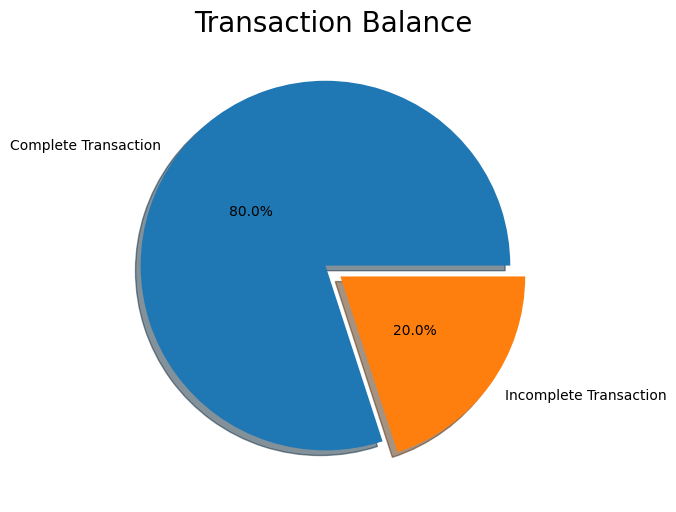

In [9]:
labels = ['Complete Transaction', 'Incomplete Transaction']
data = [df['Incomplete Transaction'].value_counts()[0],
         df['Incomplete Transaction'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Transaction Balance", fontsize=20)
plt.show()

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.


# Feature Engineering

## Total Discount Percentage 

In [10]:
df['Discount Percentage'] = ((df['Total Sales'] - df['Discounted Sales']) / df['Total Sales']) * 100

## Unique Items per total item Ratio:


In [11]:
df['Unique Items per Total Item'] = df['Unique Items'] / df['Total Items']


## Seasonality Indicator:

In [12]:
df['Month'] = pd.to_datetime(df['Date']).dt.month


## Drop columns

In [13]:
# drop useless columns for ML analysis ( we already used Date for getting the Month Feature)
#drop Customer ID , Transaction ID , Date
df.drop(columns=['Customer ID', 'Transaction ID','Date'], inplace=True)

In [14]:
df['Month']=df['Month'].astype(str)
df['Loyalty Card'] = df['Loyalty Card'].astype(str)

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# numeric_features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 'Household Income', 'Loyalty Points', "Discount Percentage", 'Unique Items per Total Item']
# categorical_features = [ 'Gender', 'Region', 'Marital Status', 'Education', 'Incomplete Transaction', 'Loyalty Card', 'Month']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Incomplete Transaction', 'Age', 'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']

We have 6 categorical features : ['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card', 'Month']


# EDA

## Correlation Matrix

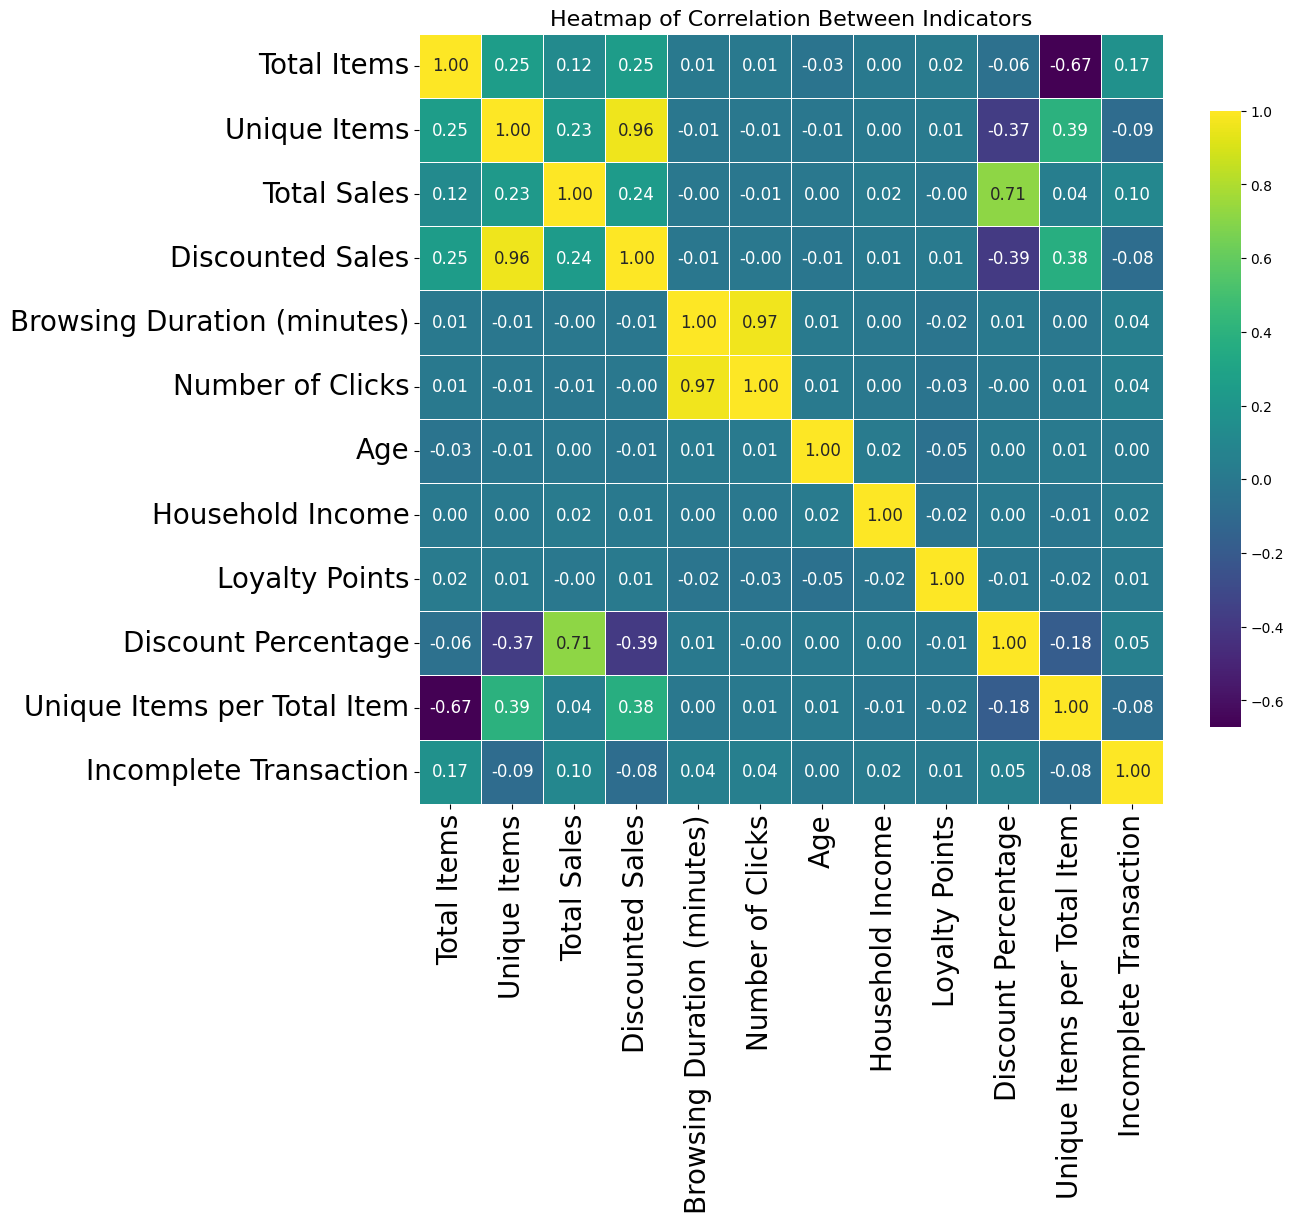

In [15]:
def generate_correlation_heatmap(dataframe):
    # Select only the numeric columns for correlation
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 10))  # Make it bigger
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='viridis',  # A different color palette
                linewidths=.5,  # Add lines between squares
                fmt=".2f",  # Limit decimal points
                cbar_kws={"shrink": .8},
                annot_kws={'size': 12})  # Adjust color bar size

    plt.title('Heatmap of Correlation Between Indicators', fontsize=16)
    plt.xticks(fontsize=20)  # Reduce font size for x labels
    plt.yticks(fontsize=20)  # Reduce font size for y labels
    plt.show()

target = 'Incomplete Transaction'
generate_correlation_heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1))

**Report**
- Number of clicks and the Browing Duration seems highly correlated also Discounted Sales unique items 
- We dropped Discounted Sales because we used it to calculate the discount percentage, and we dropped the Number of Clicks because its distribution is less normal compared to Browsing Duration. However, after a few experiments and training the model, the performance on the validation set was lower compared to before dropping these columns, so we decided to keep them.

## Variant Analysis  

In [16]:

# Loop through each categorical column
for column in categorical_features:
    # Calculate value counts for each category
    category_counts = df[column].value_counts()
    
    # Calculate total number of entries
    total_entries = len(df)
    
    # Calculate percentage of each category
    print(f"\n{column}:")
    for category, count in category_counts.items():
        percentage = (count / total_entries) * 100
        print(f"{category}: {percentage:.2f}%")



Gender:
Female: 51.12%
Male: 48.88%

Region:
Suburban: 50.88%
Urban: 24.96%
Rural: 24.16%

Marital Status:
Married: 43.68%
Single: 21.48%
Divorced: 20.04%
Widowed: 8.20%
Civil partnered: 6.60%

Education:
Graduate: 49.34%
High School: 26.16%
Post-Graduate: 16.36%

Loyalty Card:
0: 51.30%
1: 48.70%

Month:
1: 34.88%
3: 33.94%
2: 31.18%


## Bivariant analysis

### Bivariant analysis for categorical features
we will now examine each variable with respect to the Target Variable.

First, we will identify the relationship between the Target Variable and the Categorical Features. Then we will look at the Numerical Features compared to the Target Variable.

In this part, we will create 100% stacked bar and column charts showing the proportion of complete and incomplete transactions for each category of categorical features seprately

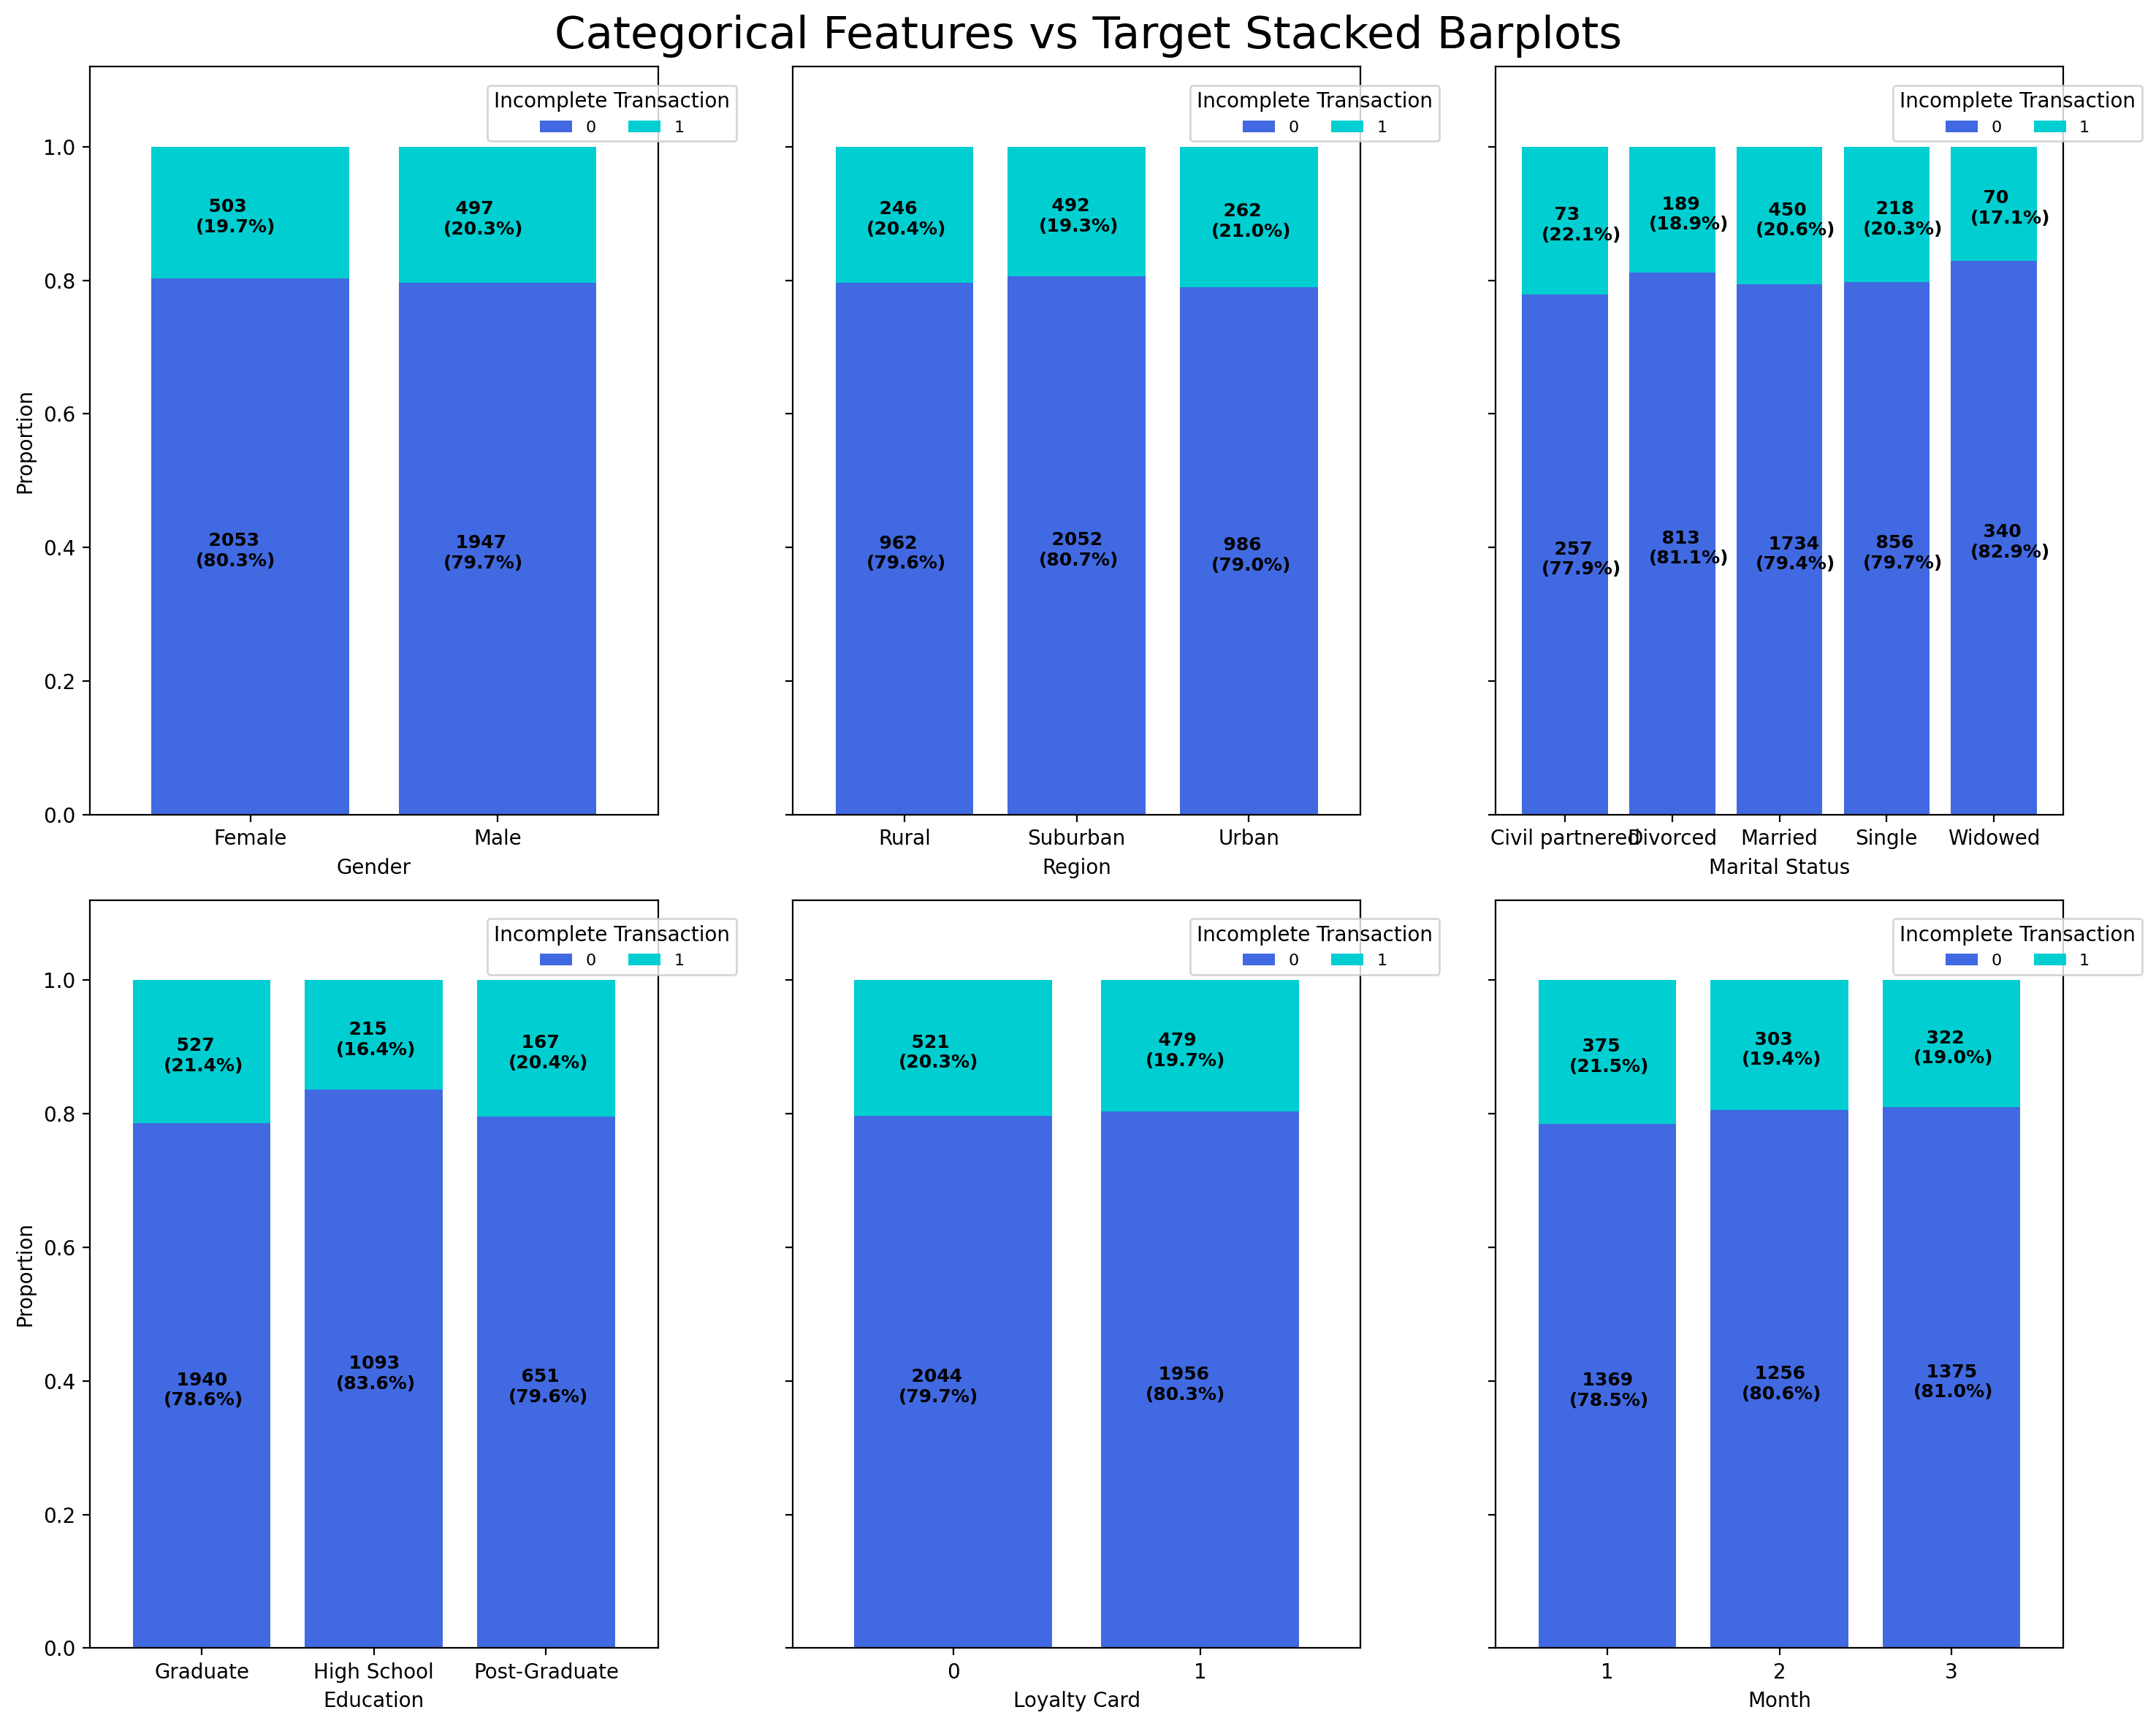

In [17]:
# Define a list containing the names of important categorical features in the dataset 
Cat_Features = ['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card', 'Month']

# Define the target name in a variable for simplicity
Target = 'Incomplete Transaction'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of complete and incomplete for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Incomplete Transaction', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

**Bivariate Analysis Report**

- The region of the customer (rural, urban) has no significant effect on the probability of completion of transactions.
- The gender of the customer has no significant effect on the probability of completion of transactions.
- The month of the purchase (January, February, March) seems to have no effect on the probability of completion of transactions.
- The probability of completing transactions for customers with a high school education seems to be higher compared to other education categories (graduate, post-graduate).
- The marital status of the customer, widows, and divorced individuals have a higher probability of completing their transactions.
- Having a loyalty card or not having it seems to have no effect on the completion of transactions.
- **Overall, no significant patterns were detected in the bivariate analysis plots indicating which categories of categorical variables have a direct effect on the probability of completion of transactions.**
- It seems like our machine learning algorithms will have a tough job distinguishing between complete and incomplete transactions.

### Bivariant analysis for numerical features


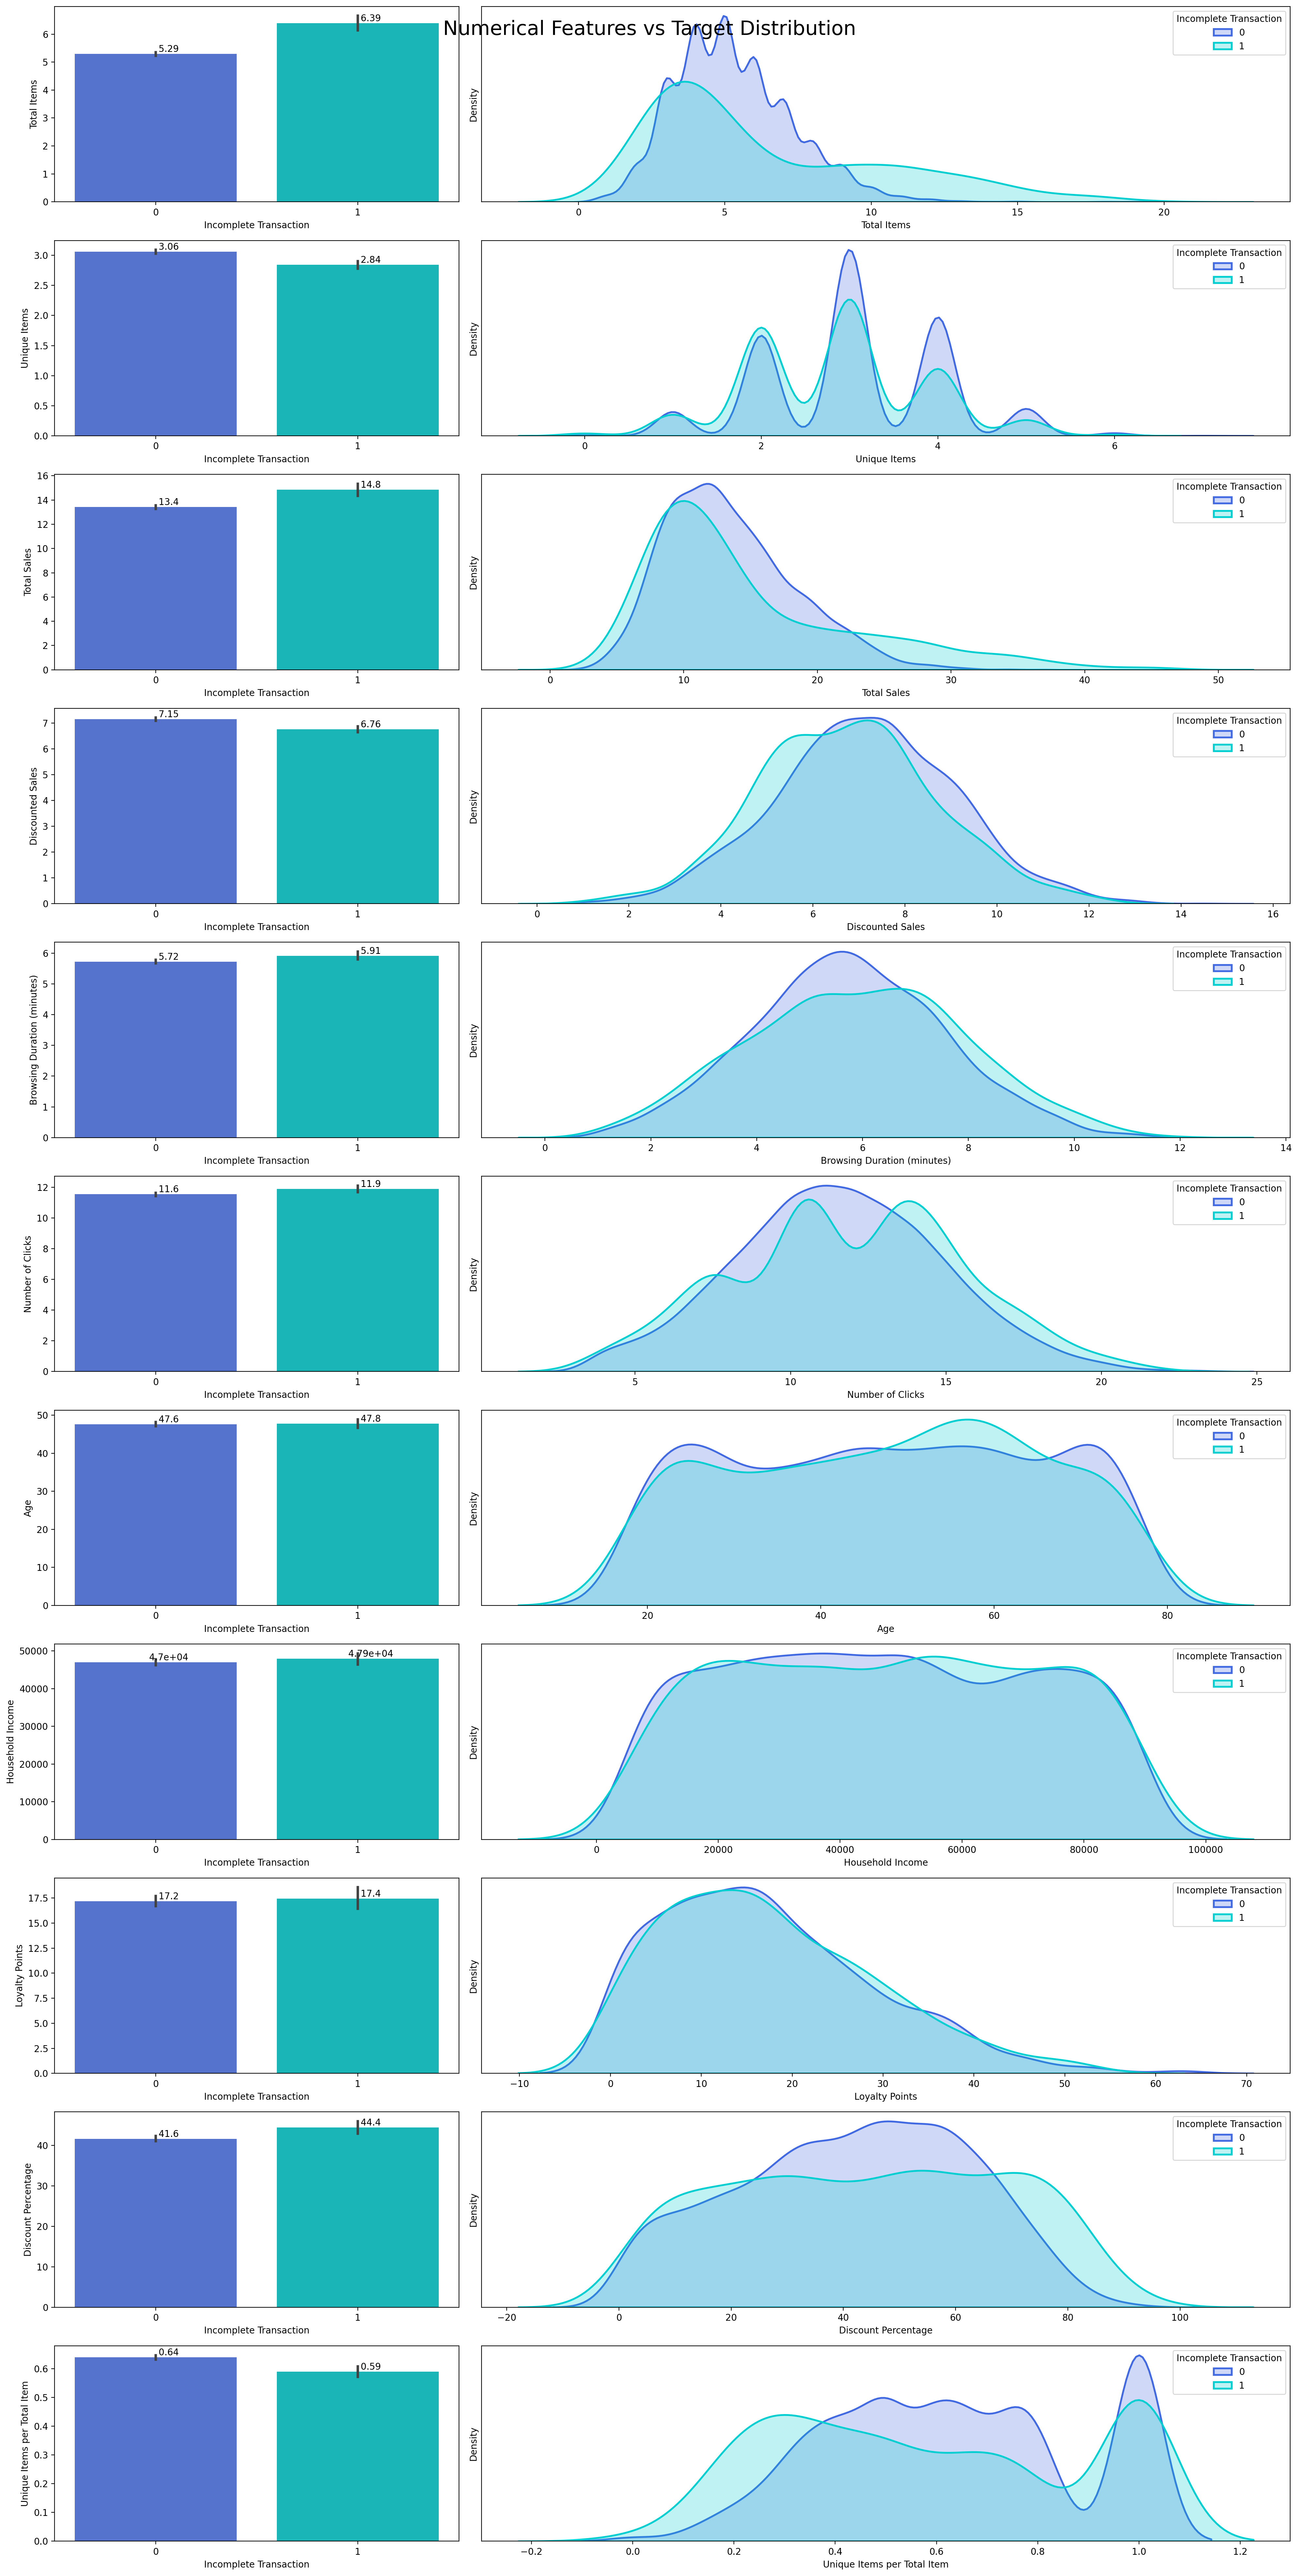

In [18]:
# Define a list containing the names of important numerical features in the dataset 
Num_Features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 
                'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']


sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(11, 2, figsize=(20,40), dpi=200, gridspec_kw={'width_ratios': [1, 2]})


for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Incomplete Transaction', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

- **again, no significant patterns were detected in the bivariate analysis plots**


# Outliers 

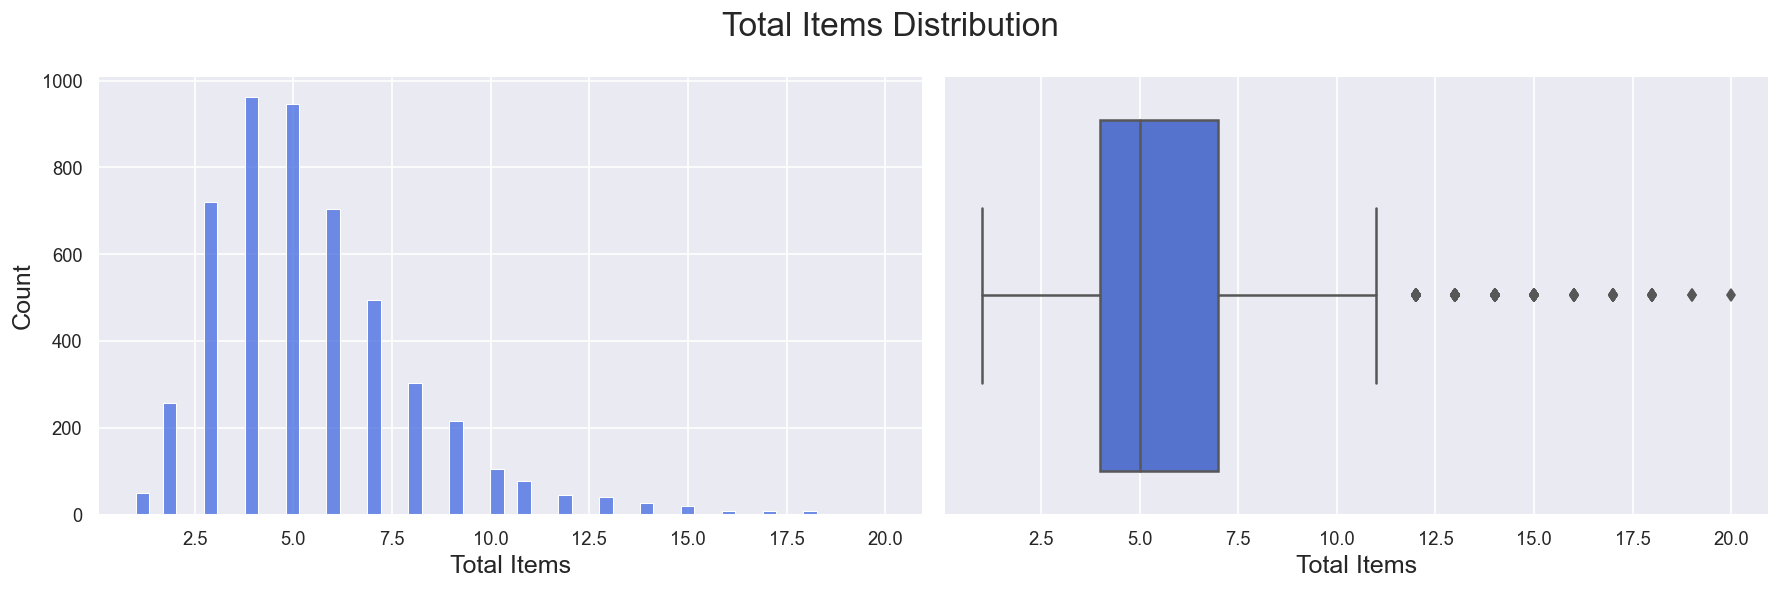

Outliers count in 'Total Items': 76


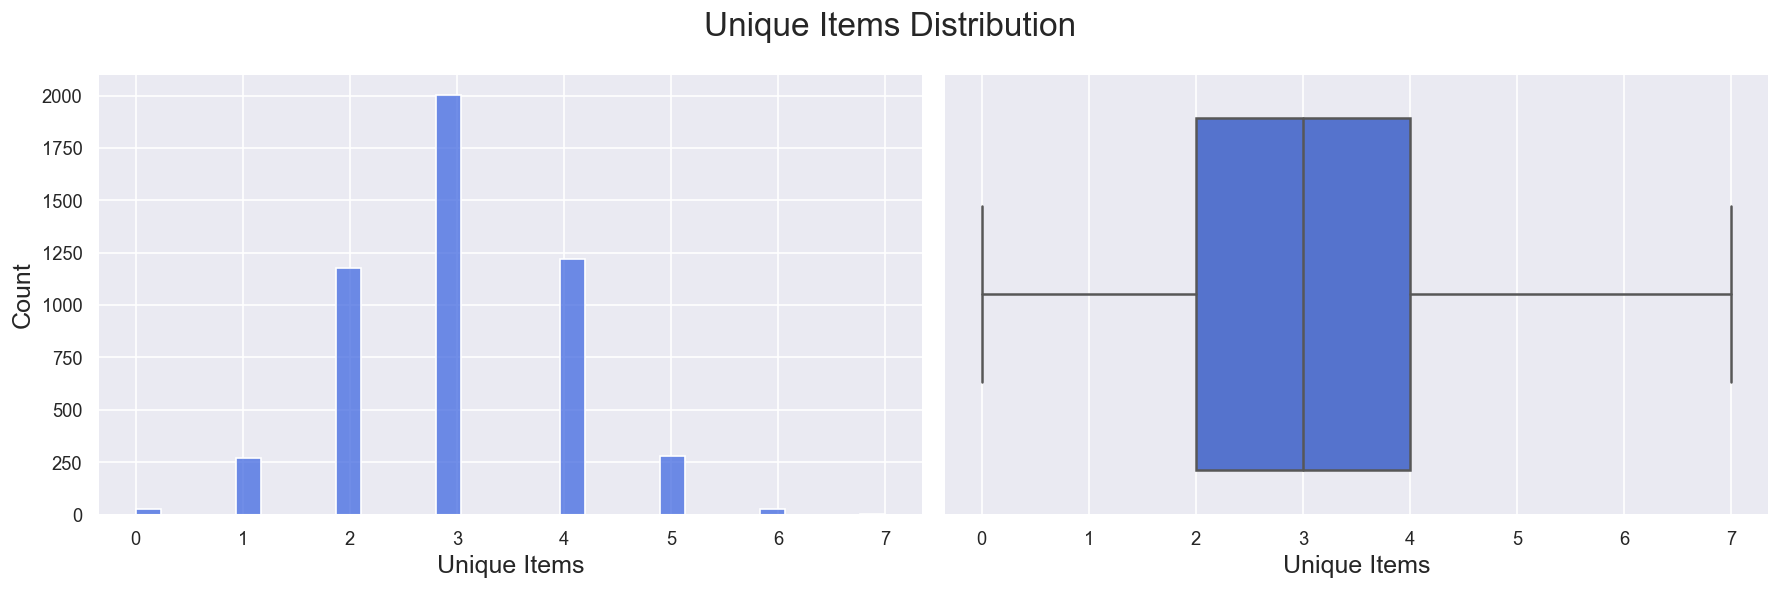

Outliers count in 'Unique Items': 1


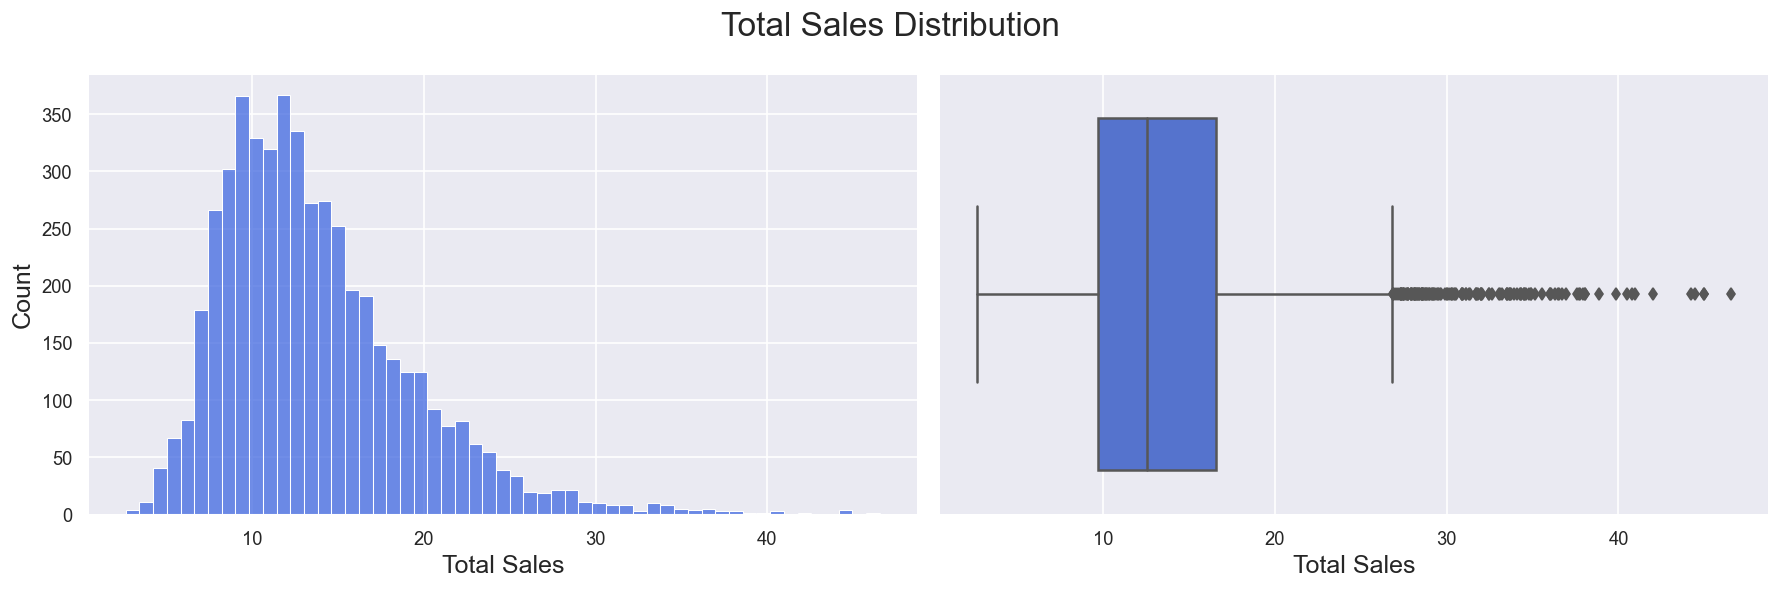

Outliers count in 'Total Sales': 68


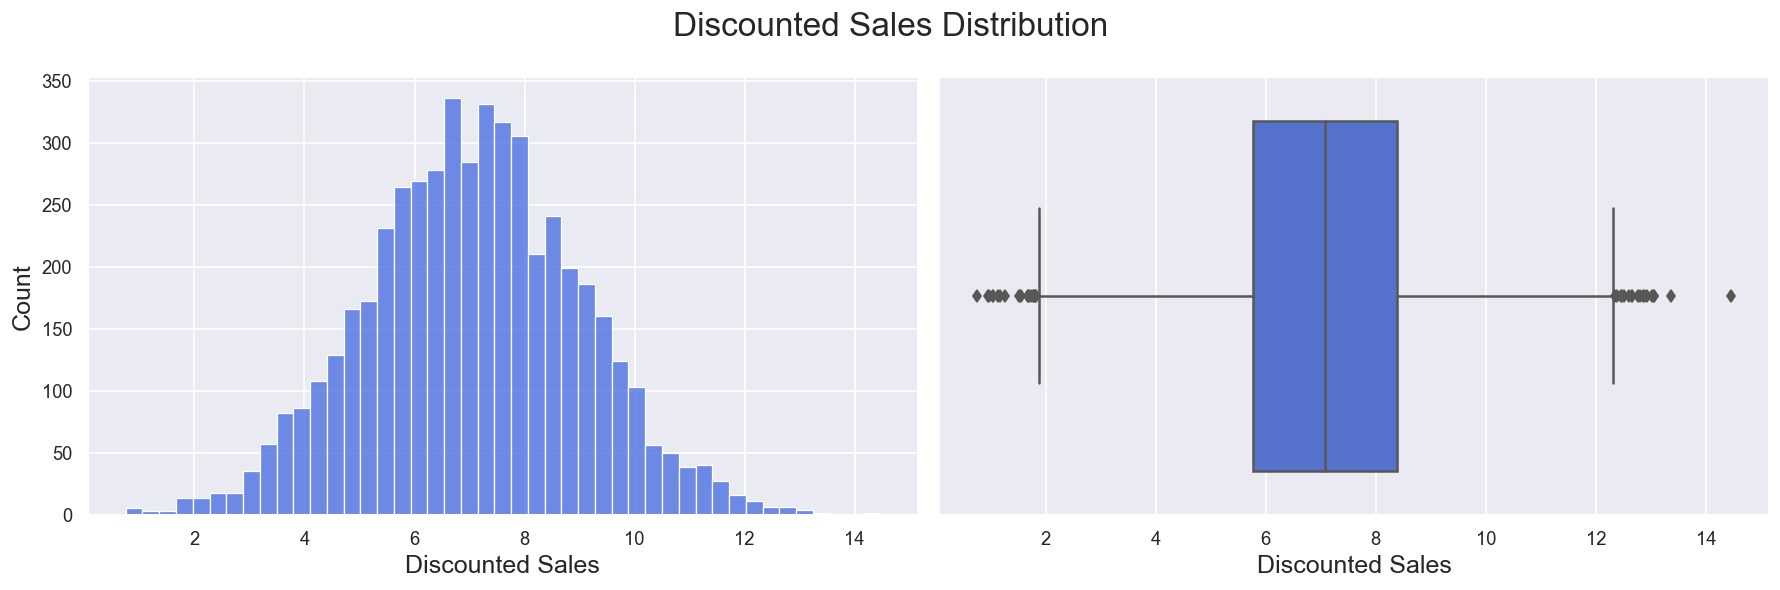

Outliers count in 'Discounted Sales': 6


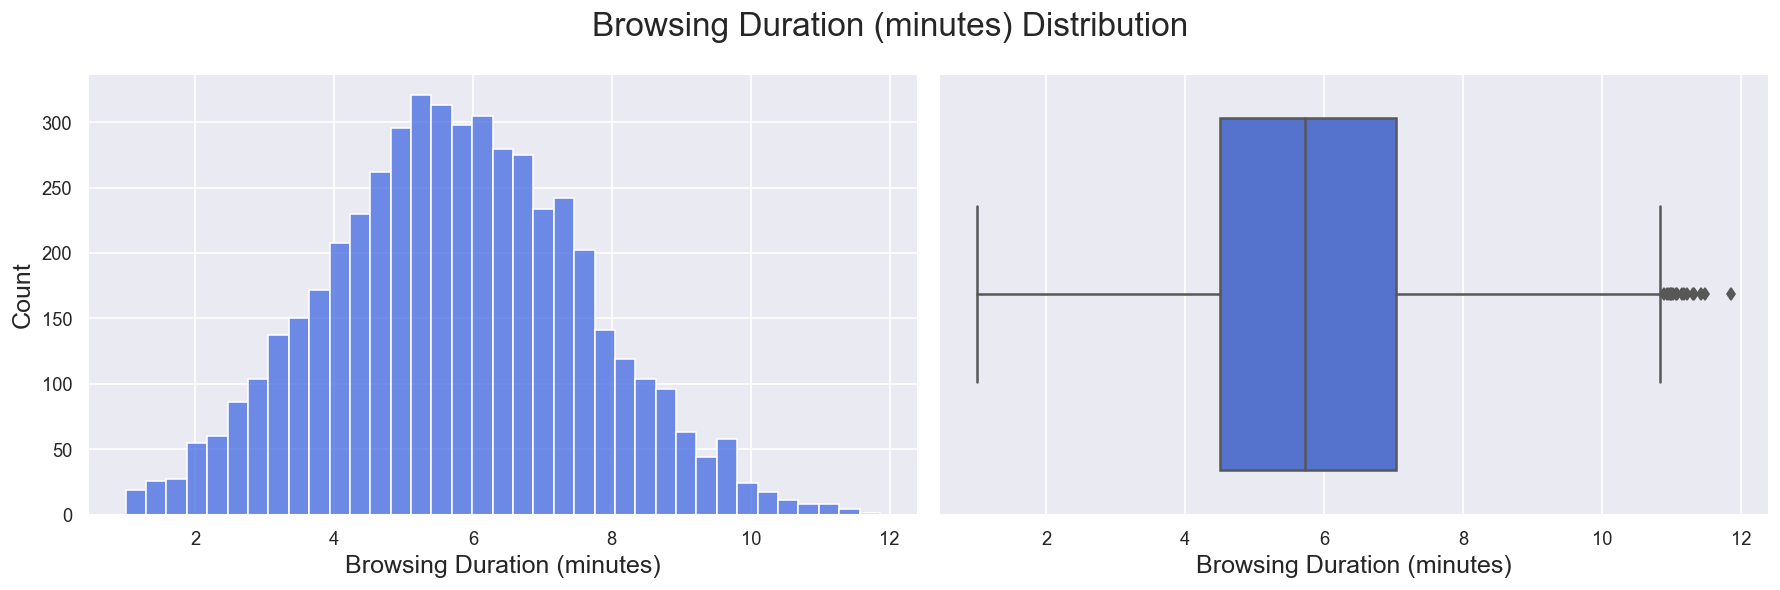

Outliers count in 'Browsing Duration (minutes)': 3


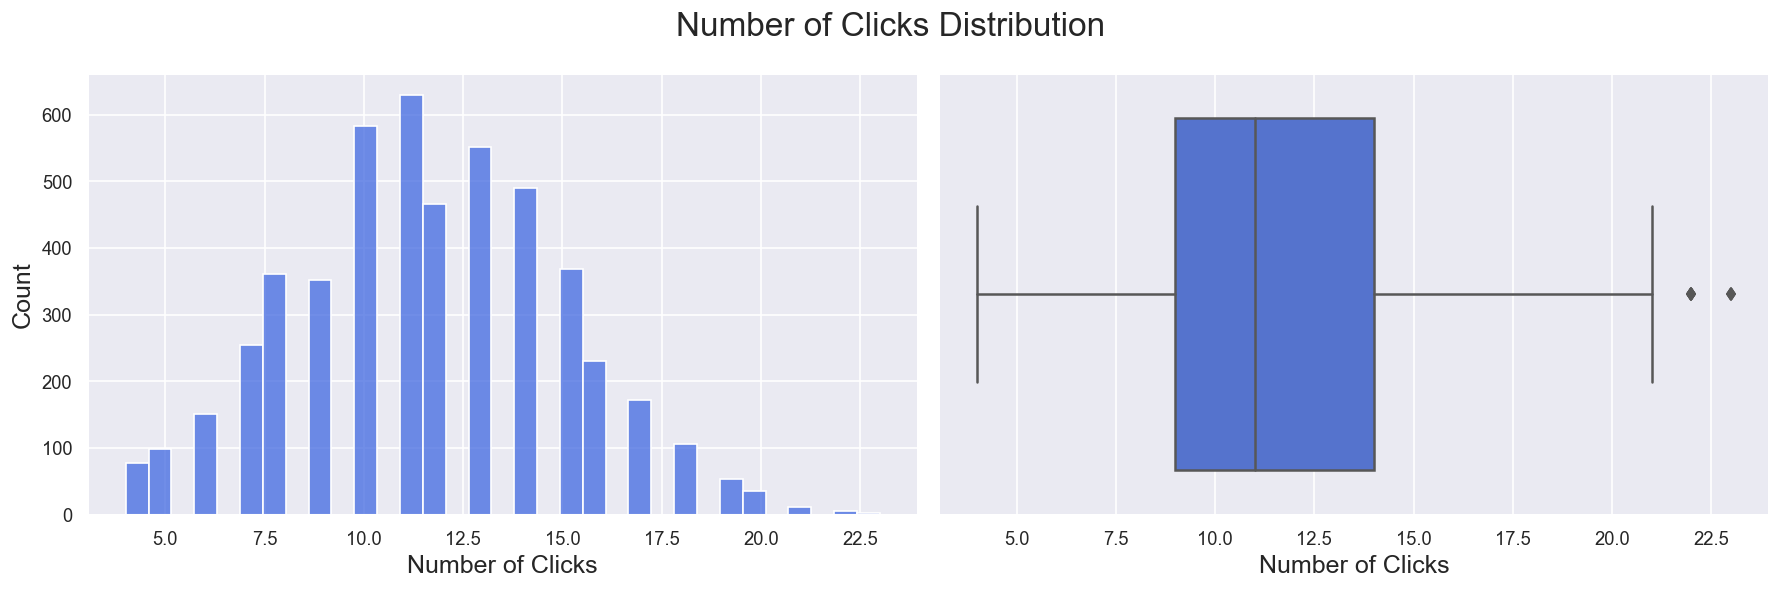

Outliers count in 'Number of Clicks': 8


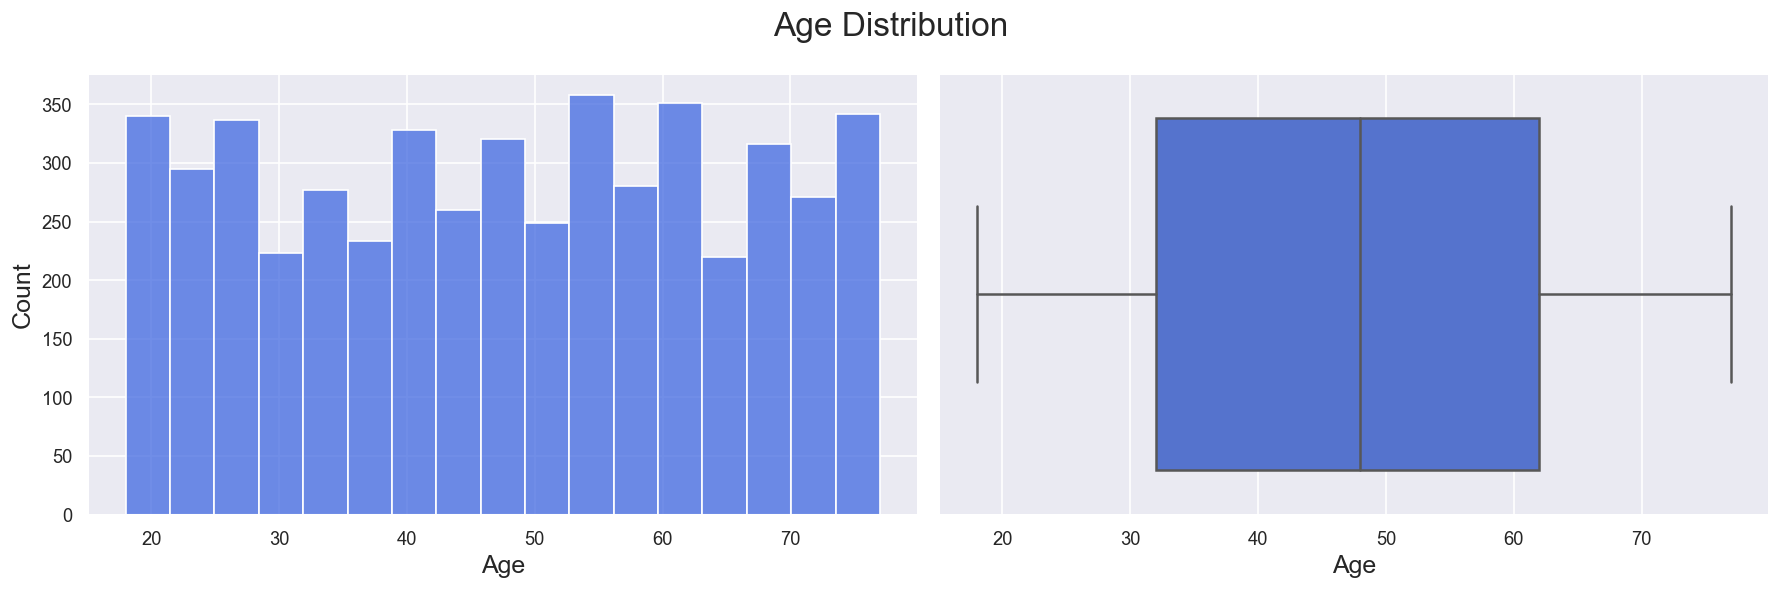

Outliers count in 'Age': 0


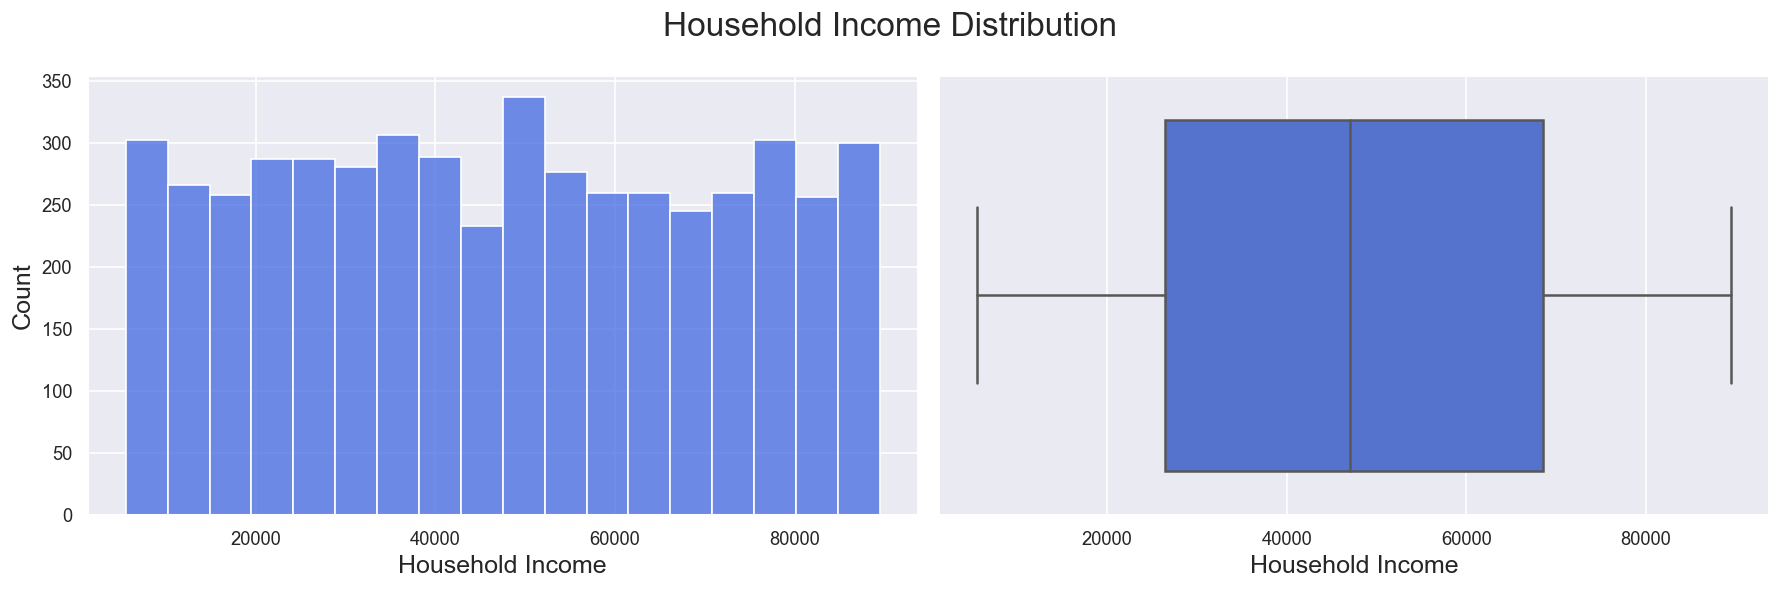

Outliers count in 'Household Income': 0


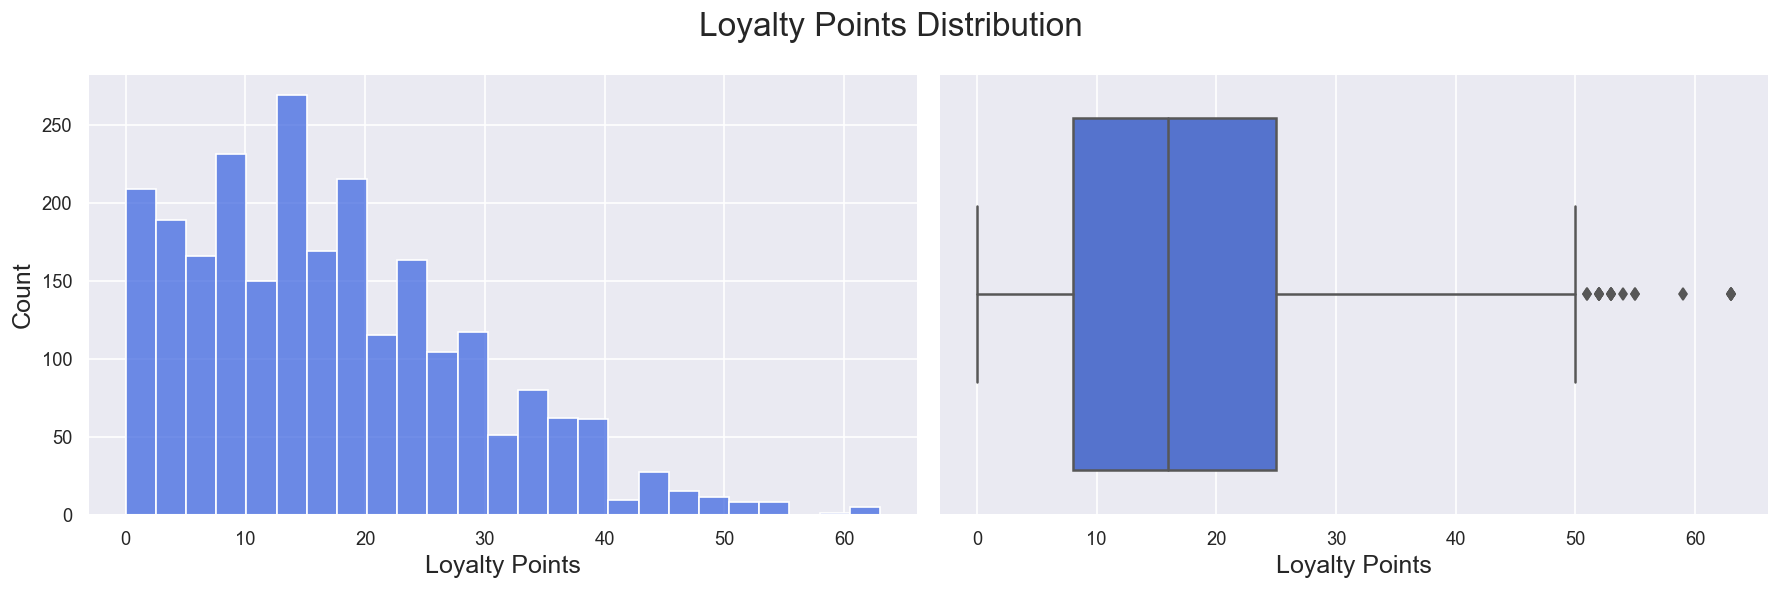

Outliers count in 'Loyalty Points': 0


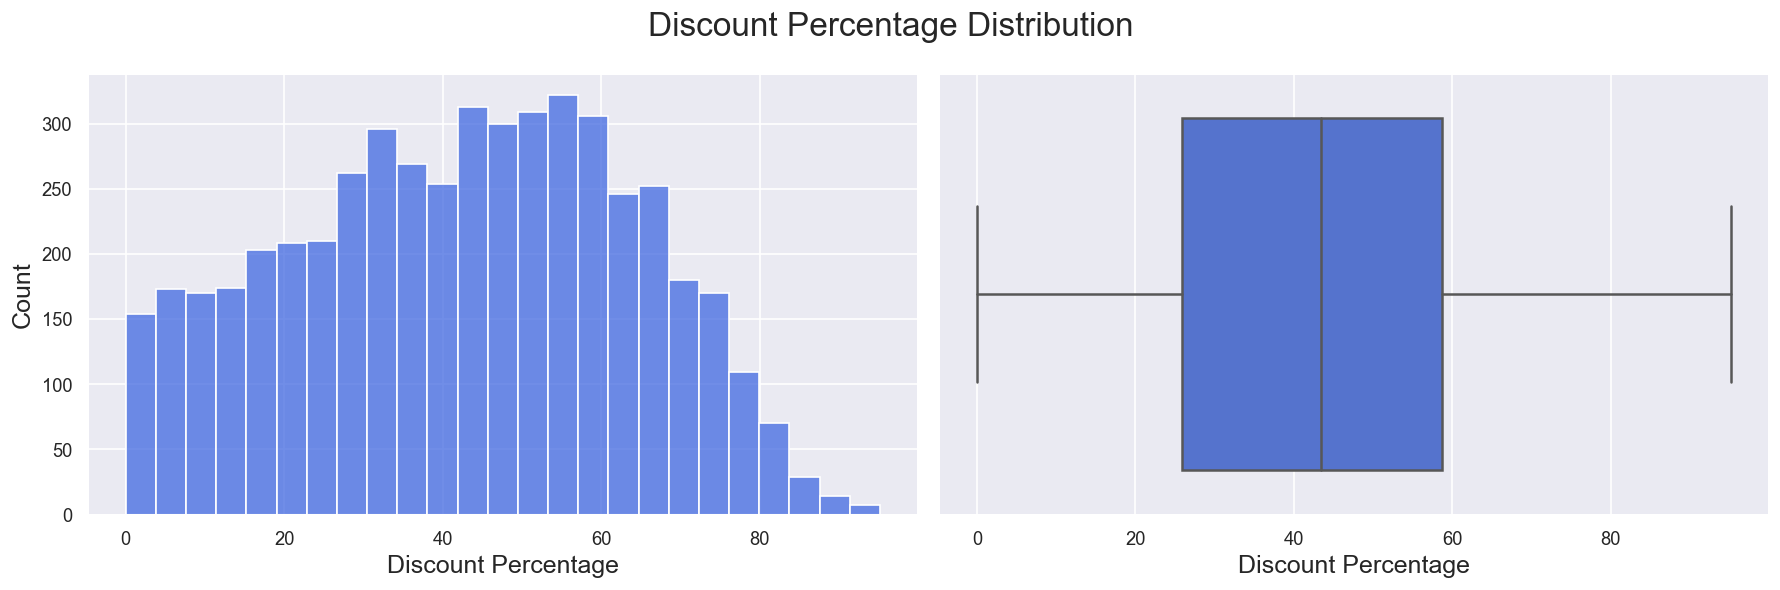

Outliers count in 'Discount Percentage': 0


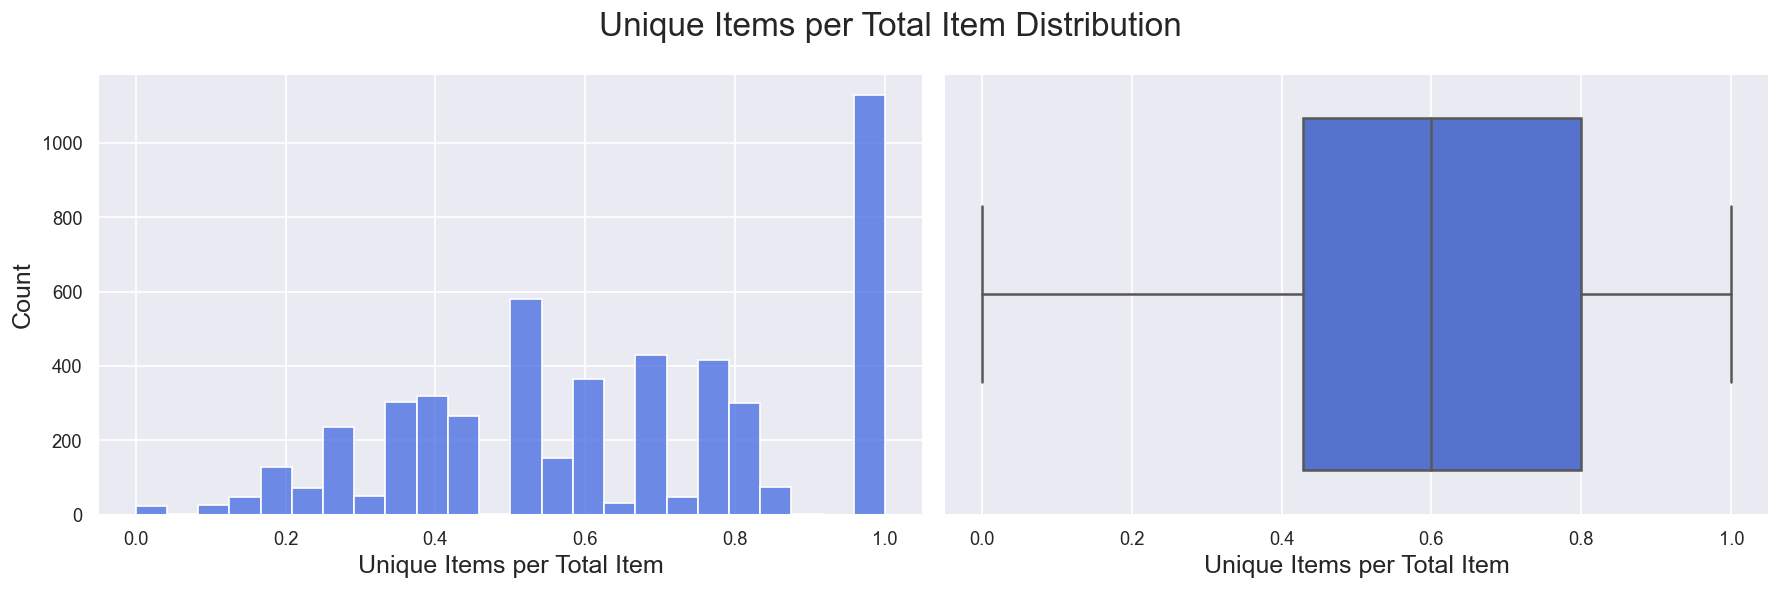

Outliers count in 'Unique Items per Total Item': 0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your dataframe

Num_Features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 
                'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']

# Set label size for axes
sns.set(rc={'axes.labelsize': 15})

# Iterate over each numerical column
for column in df[Num_Features].columns:
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=120)
    
    # Histogram
    sns.histplot(x=column, data=df, color='royalblue', ax=ax[0])
    
    # Boxplot
    sns.boxplot(x=column, data=df, color='royalblue', ax=ax[1])
    
    # Title
    plt.suptitle(f'{column} Distribution', fontsize=20)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    # Outlier detection
    outliers_count = df[stats.zscore(df[column]) > 3][column].count()
    print(f"Outliers count in '{column}': {outliers_count}")


# Model Development

from the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.
Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.
From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

## Split the data 

The approach to train test split when dealing with imbalanced datasets is to use stratification. 

Stratification is an important step in splitting imbalanced datasets into training and test sets.

Stratification ensures that the proportion of each class remains the same across both the training and test sets.

In [20]:
# Splitting X and y for all Experiments
X= df.drop('Incomplete Transaction', axis=1)
y = df['Incomplete Transaction']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((4250, 17), (750, 17))

## preprocessing

In [22]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# print columns
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))


# Define a pipeline for processing numeric features
numeric_processor = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler())
    ]
)

# Define a pipeline for processing categorical features
categorical_processor = Pipeline(
    steps=[
        ("Imputer", SimpleImputer(strategy='most_frequent')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        
    ]
)

# Combine numeric and categorical processors
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_processor, num_features), 
        ("categorical", categorical_processor, cat_features) 
    ]
)

We have 11 numerical features : Index(['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales',
       'Browsing Duration (minutes)', 'Number of Clicks', 'Age',
       'Household Income', 'Loyalty Points', 'Discount Percentage',
       'Unique Items per Total Item'],
      dtype='object')

We have 6 categorical features : Index(['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card',
       'Month'],
      dtype='object')


In [40]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

## model and parameters

In [41]:
# Define models
# models = {
#     "RandomForestClassifier": RandomForestClassifier(),
#     "DecisionTreeClassifier": DecisionTreeClassifier(),
#     "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "LogisticRegression": LogisticRegression(),
#     "KNeighborsClassifier": KNeighborsClassifier(),
#     "XGBClassifier": XGBClassifier(), 
#     "CatBoostClassifier": CatBoostClassifier(verbose=False),
#     "AdaBoostClassifier": AdaBoostClassifier(),
#     "SVC": SVC()
# }

models = {"XGBClassifier": XGBClassifier(random_state=10) }




param_grids = {
    "RandomForestClassifier": {
        "randomforestclassifier__n_estimators": [100, 200, 300, 'default'],
        "randomforestclassifier__max_depth": [None, 10, 20, 'default'],
        "randomforestclassifier__min_samples_split": [2, 5, 10, 'default'],
        "randomforestclassifier__min_samples_leaf": [1, 2, 4, 'default'],
        "randomforestclassifier__bootstrap": [True, False, 'default']
    },
    "DecisionTreeClassifier": {
        "decisiontreeclassifier__max_depth": [None, 10, 20, 'default'],
        "decisiontreeclassifier__min_samples_split": [2, 5, 10, 'default'],
        "decisiontreeclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "GradientBoostingClassifier": {
        "gradientboostingclassifier__n_estimators": [100, 200, 300, 'default'],
        "gradientboostingclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "gradientboostingclassifier__max_depth": [3, 5, 7, 'default'],
        "gradientboostingclassifier__min_samples_split": [2, 5, 10, 'default'],
        "gradientboostingclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "LogisticRegression": {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 'default'],
        "logisticregression__penalty": ['l1', 'l2', 'default']
    },
    "KNeighborsClassifier": {
        "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 'default'],
        "kneighborsclassifier__weights": ['uniform', 'distance', 'default'],
        "kneighborsclassifier__metric": ['euclidean', 'manhattan', 'default']
    },
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [100, 200, 300, 'default'],
        "xgbclassifier__max_depth": [3, 5, 7, 'default'],
        "xgbclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0, 'default'],
        "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0, 'default'],
        "xgbclassifier__reg_alpha": [0, 0.001, 0.01, 0.1, 'default'],
        "xgbclassifier__reg_lambda": [0, 0.001, 0.01, 0.1, 'default']
    },
    "CatBoostClassifier": {
        "catboostclassifier__iterations": [100, 200, 300, 'default'],
        "catboostclassifier__learning_rate": [0.03, 0.1, 0.2, 'default'],
        "catboostclassifier__depth": [4, 6, 8, 'default'],
        "catboostclassifier__l2_leaf_reg": [1, 3, 5, 7, 9, 'default']
    },
    "AdaBoostClassifier": {
        "adaboostclassifier__n_estimators": [50, 100, 200, 'default'],
        "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 'default']
    },
    "SVC": {
        "svc__C": [0.1, 1, 10, 'default'],
        "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'default'],
        "svc__gamma": ['scale', 'auto', 'default']
    }
}




param_grids = {
    "RandomForestClassifier": {},
    "DecisionTreeClassifier": {},
    "GradientBoostingClassifier": {},
    "LogisticRegression": {},
    "KNeighborsClassifier": {},
    "XGBClassifier": {},
    "CatBoostClassifier": {},
    "AdaBoostClassifier": {},
    "SVC": {}

}

param_grids = {
    "XGBClassifier": {"xgbclassifier__n_estimators": [100, 200, 300, 'default'],
        "xgbclassifier__max_depth": [3, 5, 7, 'default'],
        "xgbclassifier__learning_rate": [0.001,0.01,0.05, 0.1, 'default'],
        "xgbclassifier__Scale_pos_weight":[1,2,4,5,10,20,'default']}

}

param_grids = {
    "XGBClassifier": {}

}

param_grids = {
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [50,100, 200, 300, 'default'],
        "xgbclassifier__max_depth": [3,6,7, 'default'],
        "xgbclassifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 'default'],
        "xgbclassifier__Scale_pos_weight": [4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5,'default'],
    }
}

param_grids = {
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [50, 100, 200],
        "xgbclassifier__max_depth": [5, 6, 7],
        "xgbclassifier__learning_rate": [0.1, 0.2, 0.3],
        "xgbclassifier__Scale_pos_weight": [1,4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5],
        "xgbclassifier__min_child_weight": [1, 5, 10],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0]
    }
}



# xgb_param_grid = {
#     'max_depth': [5, 6, 7],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'n_estimators': [50, 100, 200],
#     'min_child_weight': [1, 5, 10],
#     'scale_pos_weight': [1,ratio, ratio*1.3, ratio*1.5, ratio*1.7,ratio*2.5, ratio*3.5],
#     'subsample': [0.6, 0.8, 1.0]
# }
# x

# param_grids = {
#     "XGBClassifier": {
#         "n_estimators": [25,50,100, 200, 300, 'default'],
#         "max_depth": [3,5,6,7, 'default'],
#         "learning_rate": [0.001, 0.01, 0.05, 0.1,0.2,0.3, 'default'],
#         "Scale_pos_weight": [4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5,'default'],
#         "min_child_weight": [1, 5, 10],
#         "subsample": [0.6, 0.8, 1.0],
#         "colsample_bytree": [0.6, 0.8, 1.0],
#         "colsample_bylevel": [0.6, 0.8, 1.0],
#         "reg_alpha": [0, 0.1, 1],
#         "reg_lambda": [0, 0.1, 1],
#         "max_delta_step": [0, 1, 2],
#         "gamma": [0, 0.1, 1],
#         "xmax_leaf_nodes": [2, 4, 6]
#     }
# }


In [42]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


## Balanacing strategy

In [43]:
  # # Define the pipeline with SMOTE
    # pipe = ImbPipeline(
    # steps=[
    #     ("preprocessor", preprocessor),
    #     ("SMOTE", SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)),
    #     ("classifier", model)]
    # ) 

save_models =False
output_directory =r"C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


#scoring="roc_auc"
scoring= "f1"

#kf = StratifiedKFold(n_splits=5, shuffle=False)
#balancer = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#balancer = None 
#balancer = RandomUnderSampler(random_state=42)
#balancer =RandomOverSampler(random_state=42)
#balancer = SMOTE(random_state=42)

feature_names =X.columns

## Train models

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor, balancer, param_grids,feature_names, kf, scoring, save_models=False, output_directory=None):
    results = {}

    for model_name, model in models.items():
        pipe = make_pipeline(preprocessor, balancer, model)

        # Perform grid search
        grid_search = GridSearchCV(pipe, param_grid =param_grids[model_name], cv=kf, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and its hyperparameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        classifier_step_key = model_name.lower()
        print(best_model.named_steps.keys())
        # Apply ColumnTransformer to the test data
        X_test_transformed = best_model.named_steps['columntransformer'].transform(X_test)
        # Use the transformed test data to make predictions using the classifier step
        y_test_pred = best_model.named_steps[classifier_step_key].predict(X_test_transformed)
        #y_test_pred = best_model.named_steps['columntransformer',classifier_step_key].predict(X_test) # avoid data leakage and sampling on test set by only using classifier step 

        # Evaluate Train and Test dataset
        train_acc, train_f1 , train_precision, train_recall, train_roc_au = evaluate_clf(y_train, y_train_pred)
        test_acc, test_f1 , test_precision, test_recall, test_roc_au = evaluate_clf(y_test, y_test_pred)

        #store results in dictionary
        results[model_name] = {
            'Best Hyperparameters': best_params,
            'Best Score': best_score,
            'Train Accuracy': train_acc,
            'Train F1 Score': train_f1,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train Roc Auc': train_roc_au,
            'Test Accuracy': test_acc,
            'Test F1 Score': test_f1,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test Roc Auc': test_roc_au
        }

        # Save the best model to the specified directory if specified
        if save_models and output_directory:
            current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
            model_filename = f"{model_name.replace(' ', '_')}_{current_datetime}_best_model.joblib"
            model_filepath = os.path.join(output_directory, model_filename)
            joblib.dump(best_model, model_filepath)
            results[model_name]['Saved Model Filepath'] = model_filepath

                # For models that support feature importance or coefficients
        if hasattr(best_model.named_steps[classifier_step_key], 'feature_importances_'):
            results[model_name]['Feature Importances'] = dict(zip(feature_names, best_model.named_steps[classifier_step_key].feature_importances_))
        elif hasattr(best_model.named_steps[classifier_step_key], 'coef_'):
            results[model_name]['Coefficients'] = dict(zip(feature_names, best_model.named_steps[classifier_step_key].coef_))

    return results


## Dealing with Unbalanced Data

In this stage, we will first train an XGBoost model using different strategies to deal with imbalance in the data. 

This will help us choose the most effective method to address this aspect of our data.


In [ ]:
models = {"XGBClassifier": XGBClassifier(random_state=10) }

param_grids = {
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [50, 100, 200],
        "xgbclassifier__max_depth": [5, 6, 7],
        "xgbclassifier__learning_rate": [0.1, 0.2, 0.3],
        "xgbclassifier__Scale_pos_weight": [1,4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5],
        "xgbclassifier__min_child_weight": [1, 5, 10],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0]
    }
}

save_models =False
output_directory =r"C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
scoring= "f1"
feature_names =X.columns


### without sampling

In [88]:
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=None, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'nonetype', 'xgbclassifier'])


In [90]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.478811,0.877647,0.608434,0.845188,0.475294,0.726765,0.845333,0.477477,0.736111,0.353333,0.660833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.12959023, 'Unique Items': 0...."


### Random undersampler
Under-sampling: Decrease the number of instances in the majority class by randomly removing examples

In [92]:
balancer = RandomUnderSampler(random_state=42)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomundersampler', 'xgbclassifier'])


In [93]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.516434,0.791765,0.621956,0.488263,0.856471,0.816029,0.782667,0.580977,0.472803,0.753333,0.771667,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.13292402, 'Unique Items': 0...."


### SMOTETomek method
This method combines the oversampling technique of SMOTE (Synthetic Minority Over-sampling Technique) with the undersampling technique of Tomek links to achieve better class balance in the dataset. 

In [109]:
balancer = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'smotetomek', 'xgbclassifier'])


In [110]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.49858,0.922588,0.780813,0.900154,0.689412,0.835147,0.845333,0.5,0.707317,0.386667,0.673333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.09381969, 'Unique Items': 0...."


### SMOTE sampler
Generate synthetic data points for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

In [105]:
balancer = SMOTE(random_state=42)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'smote', 'xgbclassifier'])


In [106]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.495202,0.869882,0.593681,0.790607,0.475294,0.721912,0.853333,0.545455,0.717391,0.44,0.698333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.07485636, 'Unique Items': 0...."


### Random Oversampler
Increase the number of instances in the minority class by generating random instances from minority calss.

In [107]:
balancer = RandomOverSampler(random_state=42)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomoversampler', 'xgbclassifier'])


In [108]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.53394,0.840706,0.674676,0.570268,0.825882,0.835147,0.797333,0.568182,0.49505,0.666667,0.748333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.18683942, 'Unique Items': 0...."


#### Dealing with Unbalanced Data Conclusion

As we can see from the above analysis, the XGBoost classifier gave us better results in terms of F1 score (cross-validation score) for the RandomOverSampling method (0.53394) compared to the other methods.

Therefore, we choose this method for dealing with imbalance in our data. In the next stage, we will resample our training data with this method and use grid search CV to select the best machine learning algorithm with optimal hyperparameters for our task.


In [84]:
#Define models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SVC": SVC()
}


param_grids = {
    "RandomForestClassifier": {
        "randomforestclassifier__n_estimators": [100, 200, 300, 'default'],
        "randomforestclassifier__max_depth": [None, 10, 20, 'default'],
        "randomforestclassifier__min_samples_split": [2, 5, 10, 'default'],
    },
    "DecisionTreeClassifier": {
        "decisiontreeclassifier__max_depth": [None, 10, 20, 'default'],
        "decisiontreeclassifier__min_samples_split": [2, 5, 10, 'default'],
        "decisiontreeclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "GradientBoostingClassifier": {
        "gradientboostingclassifier__n_estimators": [100, 200, 300, 'default'],
        "gradientboostingclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "gradientboostingclassifier__max_depth": [3, 5, 7, 'default'],
        "gradientboostingclassifier__min_samples_split": [2, 5, 10, 'default'],
    },
    "LogisticRegression": {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 'default'],
        "logisticregression__penalty": ['l1', 'l2', 'default']
    },
    "KNeighborsClassifier": {
        "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 'default'],
        "kneighborsclassifier__weights": ['uniform', 'distance', 'default'],
        "kneighborsclassifier__metric": ['euclidean', 'manhattan', 'default']
    },
  
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [50, 100, 200],
        "xgbclassifier__max_depth": [5, 6, 7],
        "xgbclassifier__learning_rate": [0.1, 0.2, 0.3],
        "xgbclassifier__Scale_pos_weight": [1,4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5],
        "xgbclassifier__min_child_weight": [1, 5, 10],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0]
    },

    "AdaBoostClassifier": {
        "adaboostclassifier__n_estimators": [50, 100, 200, 'default'],
        "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 'default']
    },
    "SVC": {
        "svc__C": [0.1, 1, 10, 'default'],
        "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'default'],
        "svc__gamma": ['scale', 'auto', 'default']
    }
}

In [18]:
save_models =False
output_directory =r"C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
scoring= "f1"
balancer = RandomOverSampler(random_state=42)
feature_names =X.columns


In [24]:
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

In [25]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances,Coefficients
CatBoostClassifier,"{'catboostclassifier__iterations': 100, 'catbo...",0.535184,0.863294,0.715336,0.612930,0.858824,0.861618,0.813333,0.585799,0.526596,0.660000,0.755833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 20.982664026165686, 'Unique It...",NaN
GradientBoostingClassifier,{'gradientboostingclassifier__learning_rate': ...,0.534296,0.792235,0.584471,0.487059,0.730588,0.769118,0.812000,0.595989,0.522613,0.693333,0.767500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.45879469816701407, 'Unique I...",NaN
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.531097,0.870588,0.726368,0.629310,0.858824,0.866176,0.808000,0.563636,0.516667,0.620000,0.737500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.15759404, 'Unique Items': 0....",NaN
AdaBoostClassifier,"{'adaboostclassifier__learning_rate': 0.2, 'ad...",0.513618,0.770353,0.541353,0.450704,0.677647,0.735588,0.808000,0.581395,0.515464,0.666667,0.755000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.205, 'Unique Items': 0.0, 'T...",NaN
RandomForestClassifier,"{'randomforestclassifier__max_depth': 10, 'ran...",0.508204,0.939765,0.847800,0.856971,0.838824,0.901912,0.829333,0.536232,0.587302,0.493333,0.703333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.1996758335841424, 'Unique It...",NaN
SVC,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...",0.480223,0.781647,0.548199,0.467608,0.662353,0.736912,0.796000,0.556522,0.492308,0.640000,0.737500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN
LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.451884,0.711529,0.456078,0.366097,0.604706,0.671471,0.740000,0.488189,0.402597,0.620000,0.695000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,"{'Total Items': [1.344647123960749, -1.1773769..."
DecisionTreeClassifier,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.441423,0.820000,0.644351,0.532667,0.815294,0.818235,0.702667,0.423773,0.345992,0.546667,0.644167,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.30529329578533965, 'Unique I...",NaN
KNeighborsClassifier,"{'kneighborsclassifier__metric': 'euclidean', ...",0.419627,0.755294,0.570248,0.439490,0.811765,0.776471,0.660000,0.408353,0.313167,0.586667,0.632500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN


## Focus on XGBoost with MLflow

**XGBoost** is a type of gradient boosting algorithm for tree-based machine learning models. It stands for eXtreme Gradient Boosting. XGBoost is a highly optimized implementation of gradient boosting and is designed to be fast and memory efficient.

XGBoost has several unique features compared to other gradient boosting implementations, such as:
- Handling missing values
- Parallel processing for training and prediction
- Tree pruning for reducing overfitting
- Regularization for preventing overfitting
- These features make XGBoost a popular and powerful tool for solving many machine learning problems

XGBoost (eXtreme Gradient Boosting) is an open-source library for gradient boosting that is widely used for classification and regression problems. It stands for Extreme Gradient Boosting and is an implementation of gradient boosting trees that is optimized for speed and performance. XGBoost is a highly flexible algorithm that allows users to define custom objectives and evaluation criteria and handles missing values efficiently.

Why we choose XGBoost over other algorithms in particular gradient boosting model:
- Regularization: Unlike the standard GBM implementation, XGBoost has regularization which helps to reduce overfitting.

- Fast Parallel Processing: XGBoost implements parallel processing, making it much faster than GBM. It also supports Hadoop implementation.

- High Flexibility: XGBoost allows users to define custom optimization objectives and evaluation criteria, providing a new level of customization.

- Handling Missing Values: XGBoost has an in-built routine for handling missing values and can learn how to handle them in future predictions.

- Effective Tree Pruning: XGBoost makes splits up to the specified maximum depth and then prunes the tree, whereas GBM stops splitting when it encounters a negative loss.

- Built-in Cross-Validation and Continued Training: XGBoost allows for cross-validation during each boosting iteration, making it easier to determine the optimum number of iterations. Additionally, it can start training from its last iteration of a previous run.

In [31]:
X_train_pro= preprocessor.fit_transform(X_train)
X_test_pro = preprocessor.transform(X_test)

n_estimators= 50
max_depth= 3
learning_rate= 0.2
random_state=10
scale_pos_weight= 3
min_child_weight= 2
subsample= 0.8


xgb = XGBClassifier( n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
                    random_state=random_state, scale_pos_weight=scale_pos_weight,
                      min_child_weight=min_child_weight, subsample=subsample)

xgb.fit(X_train_pro, y_train)


['C:\\Users\\layeg\\Desktop\\GitHub\\Holland_Barret\\research\\notebook_models\\XGBClassifier_20240225_110459_best_model.joblib']

In [ ]:

# save model 
import pandas as pd
import os
from pathlib import Path
model_name = "XGBClassifier"
output_directory =r'C:\Users\layeg\Desktop\GitHub\Holland_Barret\research\notebook_models'
current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{model_name.replace(' ', '_')}_{current_datetime}_best_model.joblib"
model_filepath = os.path.join(output_directory, model_filename)
joblib.dump(xgb, model_filepath)


In [32]:
os.environ["MLFLOW_TRACKING_URI"]="https://dagshub.com/layeghmorteza/Holland_Barret.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"]="layeghmorteza"
os.environ["MLFLOW_TRACKING_PASSWORD"]="47ea8e5519d9fbb79e294bf09a018544a39aa22d"

In [33]:

import os
import pandas as pd
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from pathlib import Path

    
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc




def log_into_mlflow(mlflow_uri,model_path,X_test,y_test,params):

    model = joblib.load(model_path)

    mlflow.set_registry_uri(mlflow_uri)
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    with mlflow.start_run():

        predicted_qualities = model.predict(X_test)

        (acc, f1, precision,recall,roc_auc) = evaluate_clf(y_test, predicted_qualities)
        
        # Saving metrics as local
        scores = {"acc": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}
        #save_json(path=Path(self.config.metric_file_name), data=scores)

        mlflow.log_params(params)

        mlflow.log_metric("acc", acc)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("roc_auc", roc_auc)
    

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(model, "model", registered_model_name="XGBoost")
        else:
                mlflow.sklearn.log_model(model, "model")

    
log_into_mlflow()

In [34]:

mlflow_uri="https://dagshub.com/layeghmorteza/Holland_Barret.mlflow"

params = {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2,
           'random_state': 10, 'scale_pos_weight': 3, 'min_child_weight': 2, 'subsample': 0.8}
model_path =r'C:\Users\layeg\Desktop\GitHub\Holland_Barret\research\notebook_models\XGBClassifier_20240225_110459_best_model.joblib'

log_into_mlflow(mlflow_uri, model_path, X_test_pro, y_test, params)

Registered model 'XGBoost' already exists. Creating a new version of this model...
2024/02/25 11:06:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: XGBoost, version 33
Created version '33' of model 'XGBoost'.


# Rest 

In [26]:
balancer = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'smotetomek', 'randomforestclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'decisiontreeclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'gradientboostingclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'logisticregression'])
dict_keys(['columntransformer', 'smotetomek', 'kneighborsclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'xgbclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'catboostclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'adaboostclassifier'])
dict_keys(['columntransformer', 'smotetomek', 'svc'])


In [27]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances,Coefficients
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.497553,0.906824,0.732432,0.860317,0.637647,0.805882,0.841333,0.506224,0.670330,0.406667,0.678333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.08003326, 'Unique Items': 0....",NaN
GradientBoostingClassifier,{'gradientboostingclassifier__learning_rate': ...,0.485935,0.992000,0.979592,1.000000,0.960000,0.980000,0.826667,0.453782,0.613636,0.360000,0.651667,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.3564579016651199, 'Unique It...",NaN
RandomForestClassifier,"{'randomforestclassifier__max_depth': 10, 'ran...",0.482013,0.906353,0.715714,0.910909,0.589412,0.787500,0.844000,0.506329,0.689655,0.400000,0.677500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.17937529449153883, 'Unique I...",NaN
SVC,"{'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__ke...",0.479910,0.780471,0.525674,0.462847,0.608235,0.715882,0.797333,0.525000,0.494118,0.560000,0.708333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN
AdaBoostClassifier,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.479881,0.774118,0.486631,0.446078,0.535294,0.684559,0.798667,0.508143,0.496815,0.520000,0.694167,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.48, 'Unique Items': 0.1, 'To...",NaN
CatBoostClassifier,"{'catboostclassifier__iterations': 200, 'catbo...",0.475398,0.970588,0.921136,0.993197,0.858824,0.928676,0.836000,0.481013,0.655172,0.380000,0.665000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 12.440275319118589, 'Unique It...",NaN
LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.454983,0.708471,0.458242,0.364649,0.616471,0.673971,0.745333,0.503896,0.412766,0.646667,0.708333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,"{'Total Items': [1.453290444830017, -1.1129193..."
KNeighborsClassifier,"{'kneighborsclassifier__metric': 'euclidean', ...",0.425347,0.997882,0.994715,0.992966,0.996471,0.997353,0.648000,0.443038,0.324074,0.700000,0.667500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN
DecisionTreeClassifier,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.422465,0.863765,0.627653,0.692199,0.574118,0.755147,0.809333,0.439216,0.533333,0.373333,0.645833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.5169868571281487, 'Unique It...",NaN


In [28]:
balancer = RandomUnderSampler(random_state=42)
results= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                feature_names=feature_names, kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomundersampler', 'randomforestclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'decisiontreeclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'gradientboostingclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'logisticregression'])
dict_keys(['columntransformer', 'randomundersampler', 'kneighborsclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'xgbclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'catboostclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'adaboostclassifier'])
dict_keys(['columntransformer', 'randomundersampler', 'svc'])


In [29]:
# each model is a row and each metric is a column
results = pd.DataFrame.from_dict(results, orient='index')
results_s = results.sort_values(by='Best Score', ascending=False)
results_s

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath,Feature Importances,Coefficients
CatBoostClassifier,"{'catboostclassifier__iterations': 100, 'catbo...",0.527392,0.775294,0.571557,0.461929,0.749412,0.765588,0.781333,0.556757,0.468182,0.686667,0.745833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 37.157760405102074, 'Unique It...",NaN
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.518888,0.772000,0.596418,0.461638,0.842353,0.798382,0.781333,0.583756,0.471311,0.766667,0.775833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.15073179, 'Unique Items': 0....",NaN
GradientBoostingClassifier,{'gradientboostingclassifier__learning_rate': ...,0.518020,0.790588,0.619983,0.486595,0.854118,0.814412,0.785333,0.581818,0.476596,0.746667,0.770833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.33069937365982605, 'Unique I...",NaN
AdaBoostClassifier,"{'adaboostclassifier__learning_rate': 0.2, 'ad...",0.510639,0.762824,0.544304,0.441997,0.708235,0.742353,0.797333,0.580110,0.495283,0.700000,0.760833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.195, 'Unique Items': 0.0, 'T...",NaN
RandomForestClassifier,"{'randomforestclassifier__max_depth': None, 'r...",0.496539,0.838824,0.712788,0.553746,1.000000,0.899265,0.748000,0.526316,0.421687,0.700000,0.730000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.12335170620001895, 'Unique I...",NaN
SVC,"{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kern...",0.476180,0.836000,0.556898,0.605809,0.515294,0.715735,0.841333,0.554307,0.632479,0.493333,0.710833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN
LogisticRegression,"{'logisticregression__C': 10, 'logisticregress...",0.449437,0.703059,0.457904,0.360622,0.627059,0.674559,0.741333,0.507614,0.409836,0.666667,0.713333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,"{'Total Items': [1.5886630594778393, -1.439136..."
KNeighborsClassifier,"{'kneighborsclassifier__metric': 'euclidean', ...",0.436415,0.735529,0.528128,0.410574,0.740000,0.737206,0.729333,0.491228,0.393574,0.653333,0.700833,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,NaN,NaN
DecisionTreeClassifier,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.428770,0.743059,0.538462,0.420185,0.749412,0.745441,0.714667,0.488038,0.380597,0.680000,0.701667,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...,"{'Total Items': 0.3030589107941428, 'Unique It...",NaN


#### Experiment 1
- scoring = roc_auc
- kf = StratifiedKFold(n_splits=5, shuffle=False)
- featrures = all 17 features 
- imputer_numeric = SimpleImputer(strategy='mean') , categorical_imputer = SimpleImputer(strategy='most_frequent') 
- numeric_scaler = StandardScaler(), categorical_scaler = OneHotEncoder()
- hyperparameters = defualt, GridSearchCV
- balancer = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)


In [ ]:
# each model is a row and each metric is a column
df_results_SMOTETomek = pd.DataFrame.from_dict(results, orient='index')
df_results_SMOTETomek_sorted = df_results_SMOTETomek.sort_values(by='Best Score', ascending=False)
df_results_SMOTETomek

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc
RandomForestClassifier,{},0.766337,0.99825,0.995617,0.997491,0.99375,0.996562,0.845,0.488449,0.718447,0.370,0.666875
DecisionTreeClassifier,{},0.649219,0.99825,0.995628,0.995006,0.99625,0.997500,0.754,0.435780,0.402542,0.475,0.649375
GradientBoostingClassifier,{},0.807949,0.86175,0.560064,0.770241,0.44000,0.703594,0.851,0.508251,0.747573,0.385,0.676250
LogisticRegression,{},0.731437,0.71000,0.464945,0.368421,0.63000,0.680000,0.720,0.467681,0.377301,0.615,0.680625
KNeighborsClassifier,{},0.691601,0.79200,0.649241,0.489822,0.96250,0.855938,0.664,0.432432,0.326531,0.640,0.655000
XGBClassifier,{},0.790334,0.99300,0.982211,0.998708,0.96625,0.982969,0.832,0.464968,0.640351,0.365,0.656875
CatBoostClassifier,{},0.808916,0.93450,0.810694,0.960616,0.70125,0.847031,0.850,0.519231,0.723214,0.405,0.683125
AdaBoostClassifier,{},0.761268,0.81175,0.482474,0.535878,0.43875,0.671875,0.810,0.460227,0.532895,0.405,0.658125
SVC,{},0.750691,0.85600,0.690655,0.605461,0.80375,0.836406,0.776,0.479070,0.447826,0.515,0.678125


#### Experiment 2
- scoring = roc_auc
- kf = StratifiedKFold(n_splits=5, shuffle=False)
- featrures = all 17 features 
- imputer_numeric = SimpleImputer(strategy='mean') , categorical_imputer = SimpleImputer(strategy='most_frequent') 
- numeric_scaler = StandardScaler(), categorical_scaler = OneHotEncoder()
- hyperparameters = defualt, GridSearchCV
- balancer = RandomUnderSampler(random_state=42)

In [ ]:
# each model is a row and each metric is a column
df_results_RandomUnderSampler = pd.DataFrame.from_dict(results, orient='index')
df_results_RandomUnderSampler_sorted = df_results_RandomUnderSampler.sort_values(by='Best Score', ascending=False)
df_results_RandomUnderSampler_sorted

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc
CatBoostClassifier,{},0.813012,0.81725,0.671165,0.524245,0.93250,0.860469,0.776,0.569231,0.462500,0.740,0.762500
GradientBoostingClassifier,{},0.806408,0.78725,0.604738,0.481153,0.81375,0.797187,0.768,0.550388,0.449367,0.710,0.746250
AdaBoostClassifier,{},0.794926,0.76025,0.540489,0.438228,0.70500,0.739531,0.776,0.537190,0.457746,0.650,0.728750
XGBClassifier,{},0.782963,0.81975,0.689358,0.525970,1.00000,0.887344,0.736,0.525180,0.410112,0.730,0.733750
RandomForestClassifier,{},0.773471,0.84300,0.718133,0.560224,1.00000,0.901875,0.755,0.529750,0.429907,0.690,0.730625
SVC,{},0.756762,0.75950,0.555453,0.440616,0.75125,0.756406,0.753,0.518519,0.424920,0.665,0.720000
LogisticRegression,{},0.727854,0.69950,0.453139,0.356223,0.62250,0.670625,0.736,0.501887,0.403030,0.665,0.709375
KNeighborsClassifier,{},0.696781,0.74250,0.543440,0.421016,0.76625,0.751406,0.698,0.446886,0.352601,0.610,0.665000
DecisionTreeClassifier,{},0.649844,0.77600,0.641026,0.471698,1.00000,0.860000,0.666,0.443333,0.332500,0.665,0.665625


#### Experiment 3
- scoring = roc_auc
- kf = StratifiedKFold(n_splits=5, shuffle=False)
- featrures = all 17 features 
- imputer_numeric = SimpleImputer(strategy='mean') , categorical_imputer = SimpleImputer(strategy='most_frequent') 
- numeric_scaler = StandardScaler(), categorical_scaler = OneHotEncoder()
- hyperparameters = defualt, GridSearchCV
- balancer = RandomOverSampler(random_state=42)

In [ ]:
# each model is a row and each metric is a column
df_results_RandomOverSampler = pd.DataFrame.from_dict(results, orient='index')
df_results_RandomOverSampler_sorted = df_results_RandomOverSampler.sort_values(by='Best Score', ascending=False)
df_results_RandomOverSampler_sorted


,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc
GradientBoostingClassifier,{},0.809158,0.81725,0.633584,0.528870,0.79000,0.807031,0.792,0.570248,0.485915,0.690,0.753750
CatBoostClassifier,{},0.809070,0.95525,0.894520,0.846154,0.94875,0.952813,0.843,0.590078,0.617486,0.565,0.738750
AdaBoostClassifier,{},0.796908,0.77175,0.543272,0.452877,0.67875,0.736875,0.794,0.563559,0.488971,0.665,0.745625
RandomForestClassifier,{},0.786044,1.00000,1.000000,1.000000,1.00000,1.000000,0.840,0.473684,0.692308,0.360,0.660000
XGBClassifier,{},0.779600,0.99625,0.990631,0.990012,0.99125,0.994375,0.816,0.494505,0.548780,0.450,0.678750
SVC,{},0.765615,0.84150,0.668063,0.574775,0.79750,0.825000,0.775,0.507659,0.451362,0.580,0.701875
LogisticRegression,{},0.731408,0.71525,0.468502,0.373790,0.62750,0.682344,0.738,0.490272,0.401274,0.630,0.697500
KNeighborsClassifier,{},0.670538,0.81000,0.657349,0.514104,0.91125,0.847969,0.680,0.422383,0.330508,0.585,0.644375
DecisionTreeClassifier,{},0.604688,1.00000,1.000000,1.000000,1.00000,1.000000,0.772,0.415385,0.426316,0.405,0.634375


#### Experiment 4
- scoring = roc_auc
- kf = StratifiedKFold(n_splits=5, shuffle=False)
- featrures = all 17 features 
- imputer_numeric = SimpleImputer(strategy='mean') , categorical_imputer = SimpleImputer(strategy='most_frequent') 
- numeric_scaler = StandardScaler(), categorical_scaler = OneHotEncoder()
- hyperparameters = defualt, GridSearchCV
- balancer = SMOTE(random_state=42)

In [ ]:
# each model is a row and each metric is a column
df_results_SMOTE = pd.DataFrame.from_dict(results, orient='index')
df_results_SMOTE_sorted = df_results_SMOTE.sort_values(by='Best Score', ascending=False)
df_results_SMOTE_sorted

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc
CatBoostClassifier,{},0.813678,0.93875,0.824121,0.967960,0.71750,0.855781,0.846,0.506410,0.705357,0.395,0.676875
GradientBoostingClassifier,{},0.806887,0.85850,0.545746,0.762332,0.42500,0.695937,0.850,0.496644,0.755102,0.370,0.670000
XGBClassifier,{},0.782920,0.99375,0.984127,1.000000,0.96875,0.984375,0.830,0.462025,0.629310,0.365,0.655625
RandomForestClassifier,{},0.770078,1.00000,1.000000,1.000000,1.00000,1.000000,0.848,0.506494,0.722222,0.390,0.676250
AdaBoostClassifier,{},0.757950,0.81175,0.481762,0.535988,0.43750,0.671406,0.810,0.460227,0.532895,0.405,0.658125
SVC,{},0.751215,0.85650,0.691398,0.606604,0.80375,0.836719,0.775,0.475524,0.445415,0.510,0.675625
LogisticRegression,{},0.731318,0.71050,0.464880,0.368768,0.62875,0.679844,0.721,0.468571,0.378462,0.615,0.681250
KNeighborsClassifier,{},0.692366,0.79300,0.651222,0.491105,0.96625,0.857969,0.664,0.432432,0.326531,0.640,0.655000
DecisionTreeClassifier,{},0.647188,1.00000,1.000000,1.000000,1.00000,1.000000,0.758,0.439815,0.409483,0.475,0.651875


In [ ]:
import pandas as pd

# Assuming df_results_SMOTETomek, df_results_RandomUnderSampler, df_results_RandomOverSampler, df_results_SMOTE are your dataframes

# Combine dataframes
combined_df = pd.concat([df_results_SMOTETomek, df_results_RandomUnderSampler, df_results_RandomOverSampler, df_results_SMOTE], axis=0)

# Optionally, you can add a 'Balancer' column to identify which balancer was used for each row
combined_df['Balancer'] = ['SMOTETomek'] * len(df_results_SMOTETomek) + ['RandomUnderSampler'] * len(df_results_RandomUnderSampler) + ['RandomOverSampler'] * len(df_results_RandomOverSampler) + ['SMOTE'] * len(df_results_SMOTE)



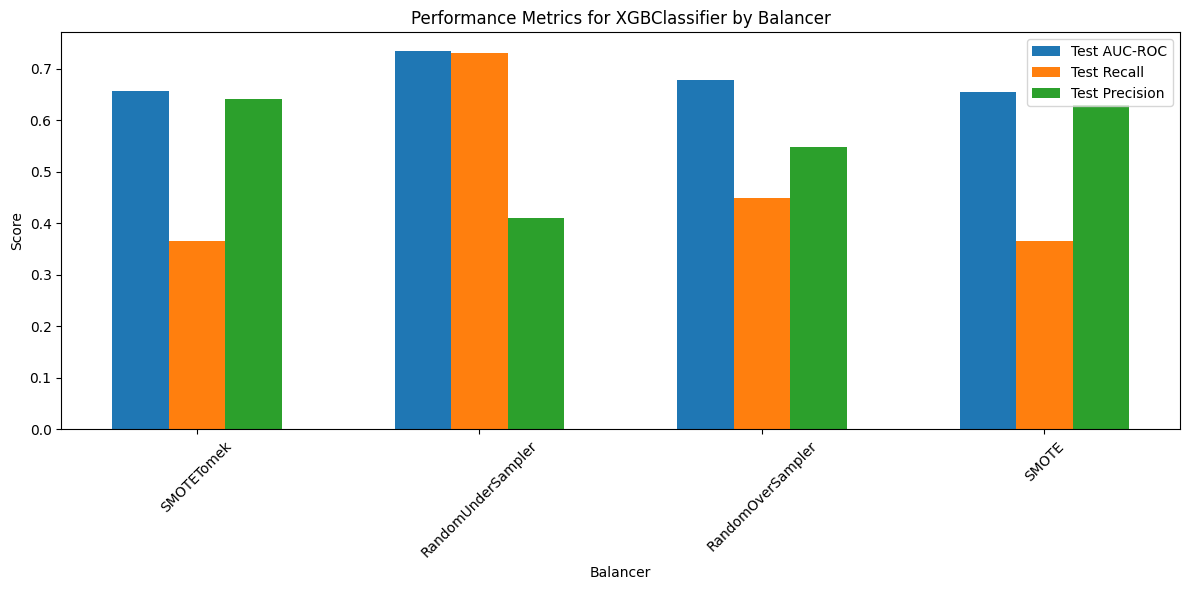

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter rows for SVC classifier
svc_df = combined_df[combined_df.index == 'XGBClassifier']

# Get unique balancer options
balancers = svc_df['Balancer'].unique()

# Define width for each bar
bar_width = 0.2

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot test AUC-ROC, recall, and precision for different balancer options
index = np.arange(len(balancers))
bar1 = ax.bar(index - bar_width, svc_df['Test Roc Auc'], bar_width, label='Test AUC-ROC')
bar2 = ax.bar(index, svc_df['Test Recall'], bar_width, label='Test Recall')
bar3 = ax.bar(index + bar_width, svc_df['Test Precision'], bar_width, label='Test Precision')

# Set x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(balancers, rotation=45)

# Add labels, title, and legend
ax.set_xlabel('Balancer')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics for XGBClassifier by Balancer')
ax.legend()

plt.tight_layout()
plt.show()


# modular code 

# Code Explanation
- setup.py is resposible for creating ML application as a python package and depoloying in the pypi 
- tutorial 4 . 17:00
- in data_ingestion testdf and traindf is not used stratified split but i checked the distribution is almost correct in th test df (799,201). maybe it is better to change that so not book be the same.
- till now we are implementing 
- till end of hyperparameter tuning episod 7
- we need to implemet tran pipeline. look at the code on the dowloads file. the train pipe line seems easy if you donot want to run it on the cloud.
- predic pipeline we can use the krish tutorial 
- by runnig data ingestion , the code runes and we can train the models. the only thing is to we are preprocessing the train dataset in the data tarnsformation which coul messed with the grid search becuase daat leakage to cv.
- ml flow https://www.youtube.com/watch?v=pxk1Fr33-L4&list=PLZoTAELRMXVPS-dOaVbAux22vzqdgoGhG&index=22

In [ ]:
#read df 
df = pd.read_csv(r"C:\Users\layeg\Desktop\GitHub\Holland_and_Barret\artifacts\test.csv")

In [ ]:
df['Incomplete Transaction'].value_counts()

Incomplete Transaction
0    799
1    201
Name: count, dtype: int64

- cost senstive svm is not improving . even after balancing having a weight 

# kaggle

In [47]:

# Convert training and test sets from numpy array to pandas dataframes
# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_test = pd.DataFrame(X_train, columns=X.columns)

In [34]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [14]:
from sklearn.metrics import RocCurveDisplay
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    #Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

In [15]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

## GridSearchCV or randomsearch 

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses 
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects  
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

## XGboost


In [24]:
# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1) 

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1,ratio, ratio*1.3, ratio*1.5, ratio*1.7,ratio*2.5, ratio*3.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}


xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1,ratio, ratio*1.3, ratio*1.5, ratio*1.7,ratio*2.5, ratio*3.5],
    'subsample': [0.6, 0.8, 1.0]
}
# xgb_param_grid = {

# }

In [30]:
# sampling 
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


kf = StratifiedKFold(n_splits=5, shuffle=False)
#balancer = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#balancer = None 
#balancer = RandomUnderSampler(random_state=42)
#balancer =RandomOverSampler(random_state=42)
#balancer = SMOTE(random_state=42)


# Define the over-sampling and under-sampling methods
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42,sampling_strategy=0.4)


# Combine them in a pipeline
balancer = imPipeline([
    ('under_sampling', under_sampler),
    ('over_sampling', over_sampler)
])


X_train_re, y_train_re= balancer.fit_resample(X_train, y_train)

#X_train_re, y_train_re = X_train, y_train

In [61]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)


Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3200
           1       0.66      0.99      0.79       800

    accuracy                           0.90      4000
   macro avg       0.83      0.93      0.86      4000
weighted avg       0.93      0.90      0.90      4000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       800
           1       0.50      0.69      0.58       200

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.80      0.81      1000



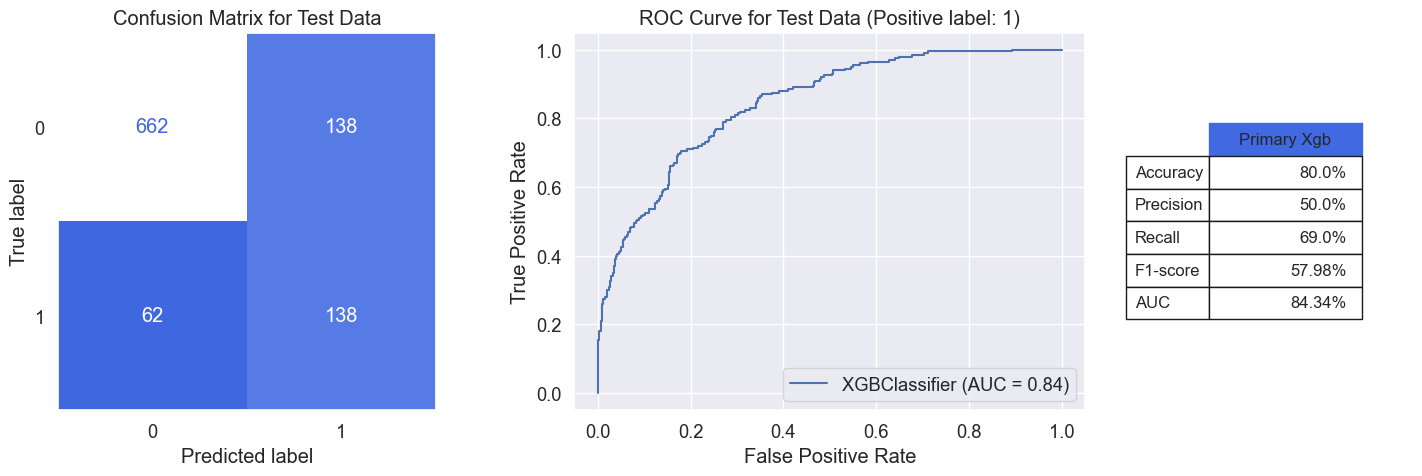

In [169]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')



### without sampling

In [54]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)

Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 50, 'scale_pos_weight': 4.0, 'subsample': 0.8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3400
           1       0.54      0.83      0.65       850

    accuracy                           0.82      4250
   macro avg       0.75      0.83      0.77      4250
weighted avg       0.87      0.82      0.84      4250


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       600
           1       0.50      0.67      0.57       150

    accuracy                           0.80       750
   macro avg       0.70      0.75      0.72       750
weighted avg       0.83      0.80      0.81       750



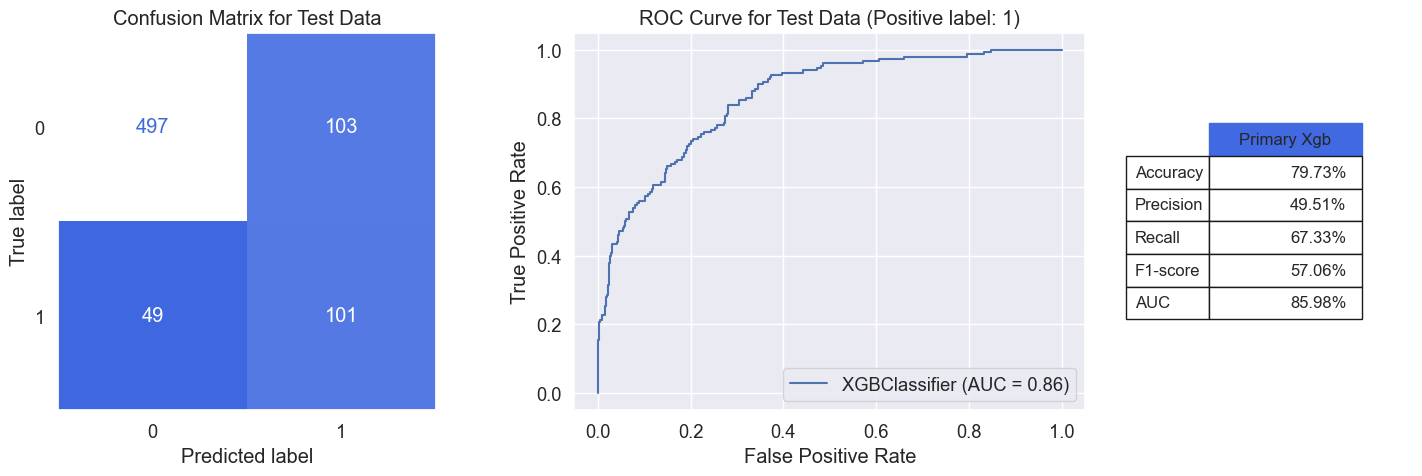

In [55]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')


### Random under sample

In [58]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)

Best hyperparameters:
 {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'scale_pos_weight': 4.0, 'subsample': 0.8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.73      0.85       850
           1       0.79      1.00      0.88       850

    accuracy                           0.87      1700
   macro avg       0.89      0.87      0.86      1700
weighted avg       0.89      0.87      0.86      1700


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       600
           1       0.32      0.88      0.47       150

    accuracy                           0.60       750
   macro avg       0.63      0.71      0.57       750
weighted avg       0.82      0.60      0.64       750



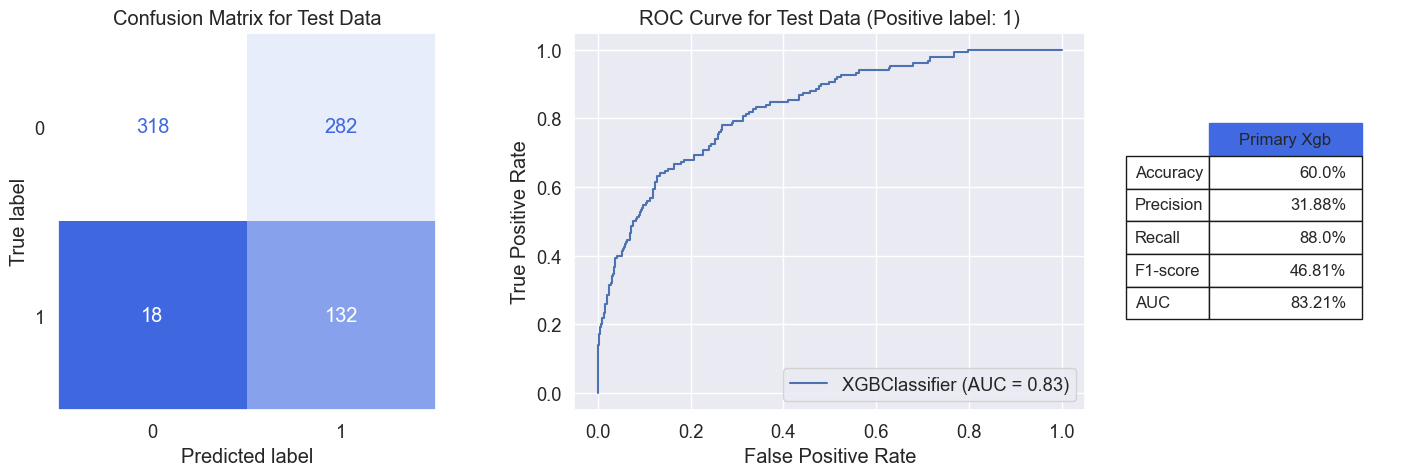

In [59]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')


### SMOTomek

In [ ]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3392
           1       1.00      0.95      0.97      3392

    accuracy                           0.97      6784
   macro avg       0.97      0.97      0.97      6784
weighted avg       0.97      0.97      0.97      6784


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       600
           1       0.68      0.39      0.49       150

    accuracy                           0.84       750
   macro avg       0.77      0.67      0.70       750
weighted avg       0.83      0.84      0.82       750



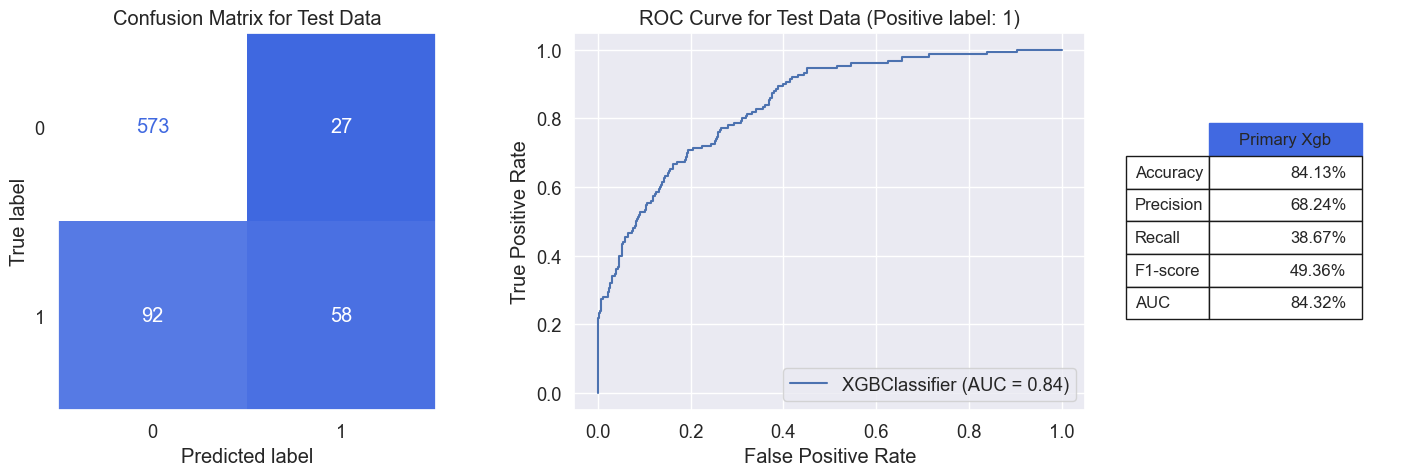

In [62]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')

### Smote


In [65]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)

Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3400
           1       0.99      0.93      0.96      3400

    accuracy                           0.96      6800
   macro avg       0.96      0.96      0.96      6800
weighted avg       0.96      0.96      0.96      6800


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       600
           1       0.70      0.37      0.49       150

    accuracy                           0.84       750
   macro avg       0.78      0.67      0.70       750
weighted avg       0.83      0.84      0.82       750



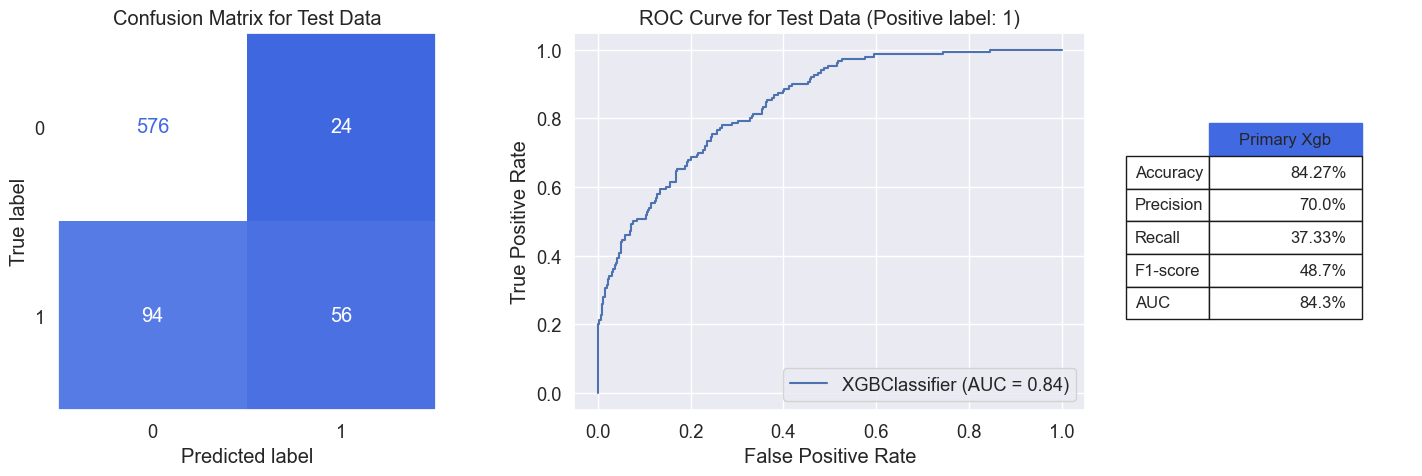

In [66]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')

In [ ]:
### Random over sample

In [69]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)

Best hyperparameters:
 {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3400
           1       1.00      1.00      1.00      3400

    accuracy                           1.00      6800
   macro avg       1.00      1.00      1.00      6800
weighted avg       1.00      1.00      1.00      6800


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       600
           1       0.59      0.40      0.48       150

    accuracy                           0.83       750
   macro avg       0.73      0.67      0.69       750
weighted avg       0.81      0.83      0.81       750



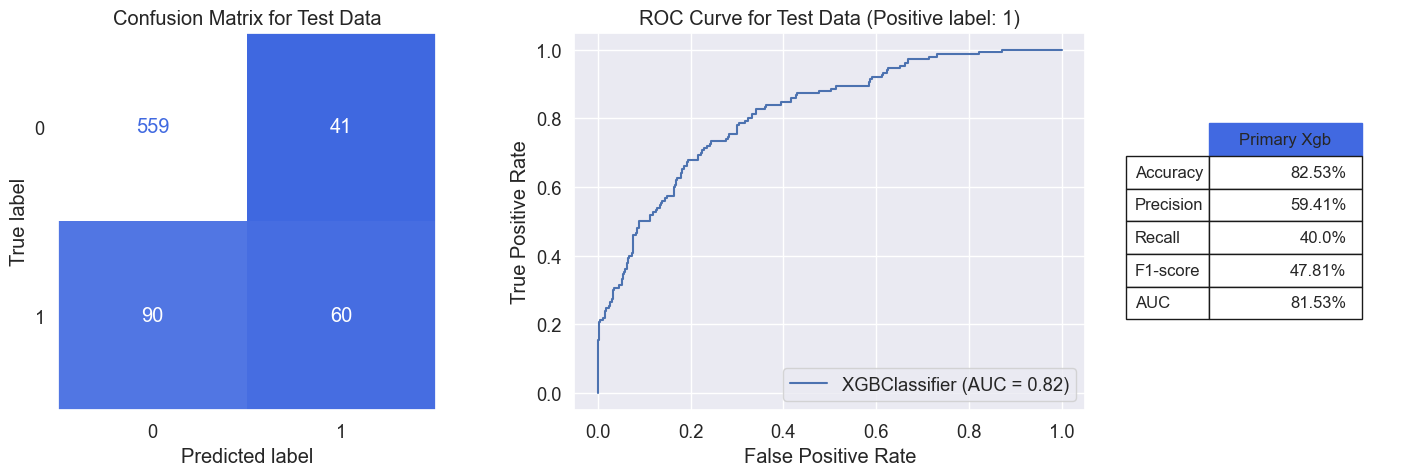

In [70]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')

#### over and onder 

In [31]:
# Initialize the XGBoost Classifier
xgb= XGBClassifier(random_state=10)

# Train the XGBoost Classifier
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train_re, y_train_re)

Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2125
           1       1.00      1.00      1.00      2125

    accuracy                           1.00      4250
   macro avg       1.00      1.00      1.00      4250
weighted avg       1.00      1.00      1.00      4250


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       600
           1       0.58      0.60      0.59       150

    accuracy                           0.83       750
   macro avg       0.74      0.75      0.74       750
weighted avg       0.84      0.83      0.83       750



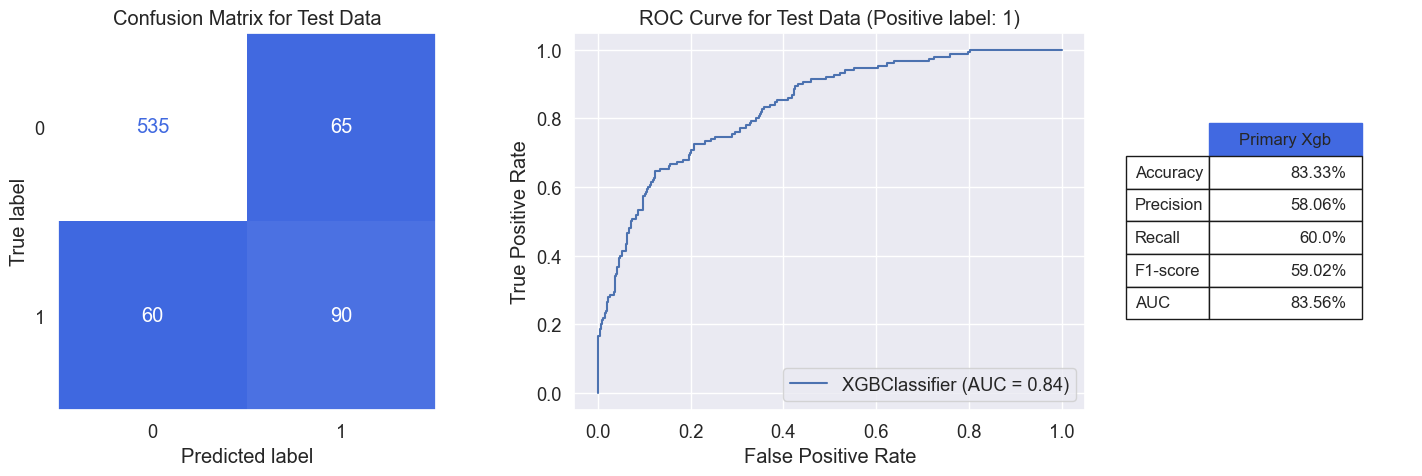

In [35]:
model_evaluation(xgb_opt, X_train_re, X_test, y_train_re, y_test, 'Primary Xgb')